In [1]:
import igraph as ig
import leidenalg as la #https://leidenalg.readthedocs.io/en/latest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from igraph import Graph #https://python.igraph.org/en/stable/install.html
from modwt import modwt, modwtmra
from scipy.stats import t
from fMRI_pearson import fMRISeq
from sklearn.metrics import normalized_mutual_info_score as NMI
import pickle

In [2]:
# load data
data = loadmat(r"E:\NS\Primate fMRI\data\awake_fmri")['awake_fmri']
T_mats_total = []

In [3]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data_seq = data[i,j]
        if data_seq.shape[1] < 10:
            continue
        # initialize the fMRISeq class
        fmri_seq = fMRISeq(data_seq,l_window =20,step =10)
        fmri_seq = fmri_seq.load_results('E:\\NS\\Primate fMRI\\community\\results\\l40_s20_%d_%d.pkl'%(i,j))
        #MSC_mats = fmri_seq.calc_MSC()

        #membership_array = fmri_seq.cluster_MSC(resolution_parameter = 1,pval = True,max_communities=0,seed = 8192,consider_empty_community = True)

        T_array = fmri_seq.modular_allegiance_matrix()
        T_mats_total.append(T_array)
        #fmri_seq.save_results('E:\\NS\\Primate fMRI\\community\\results\\l40_s20_%d_%d.pkl'%(i,j))
        #print('finish %d %d'%(i,j))



        

<AxesSubplot:>

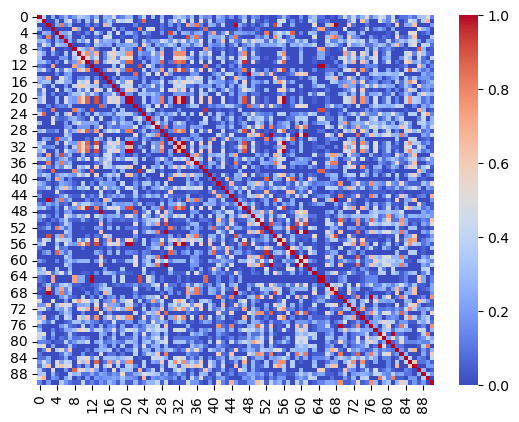

In [4]:
T_total = np.vstack(T_mats_total)
T_mean = np.mean(T_total,axis=0)
sns.heatmap(np.mean(T_mats_total[2],axis=0),cmap='coolwarm')

<AxesSubplot:>

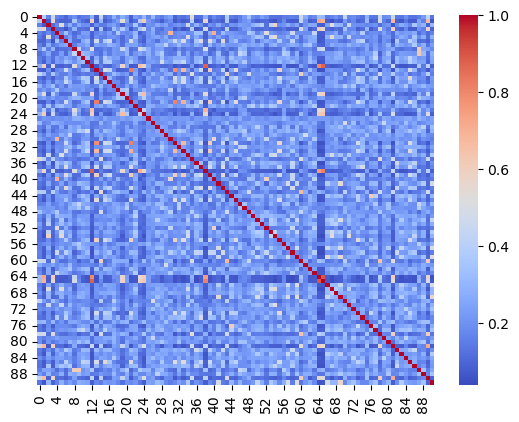

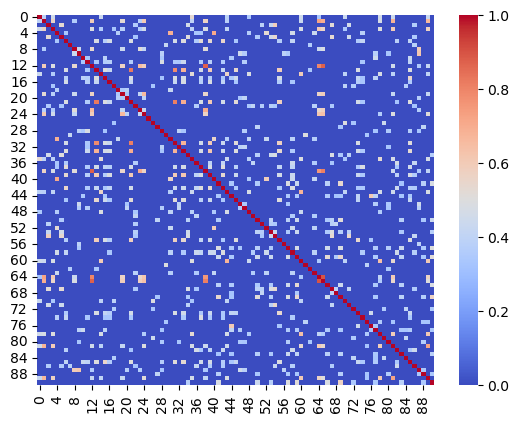

In [5]:
sns.heatmap(T_mean,cmap='coolwarm')
T_mean_thresh = T_mean.copy()
T_mean_thresh[T_mean_thresh<0.325] = 0
plt.figure()
sns.heatmap(T_mean_thresh,cmap='coolwarm')

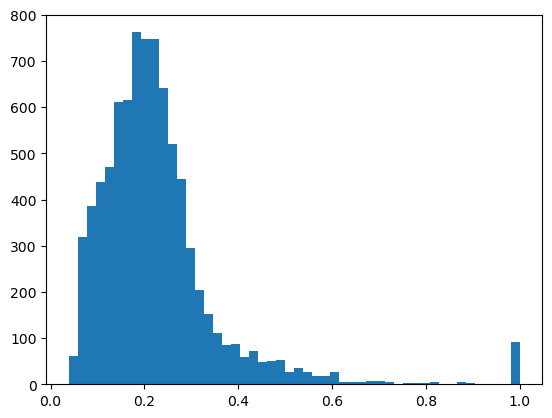

In [6]:
FIG = plt.hist(T_mean.flatten(),bins=50)

In [7]:
graph = Graph.Weighted_Adjacency(T_mean_thresh, mode='undirected', attr='weight',loops = False)
optimiser = la.Optimiser()
partition = la.find_partition(graph, la.RBConfigurationVertexPartition,resolution_parameter=1)
print(partition.membership)
partition.q

[0, 0, 3, 0, 4, 3, 1, 6, 0, 5, 1, 1, 0, 1, 0, 1, 1, 7, 4, 0, 5, 1, 3, 0, 0, 8, 7, 2, 5, 6, 4, 1, 5, 1, 3, 0, 4, 1, 0, 1, 4, 2, 1, 0, 2, 1, 5, 5, 0, 4, 2, 3, 4, 3, 3, 1, 5, 2, 4, 2, 0, 6, 6, 4, 0, 0, 2, 3, 3, 2, 0, 3, 7, 1, 1, 6, 2, 2, 0, 7, 5, 0, 1, 2, 7, 1, 3, 5, 2, 0, 2]


0.6131801605654501

In [8]:
partition1 = la.find_partition(graph, la.RBConfigurationVertexPartition,resolution_parameter=1,seed=1024)
membership_dict = fmri_seq.visualize_single(partition1.membership)
fmri_seq.print_membership_dicts([membership_dict])
print(max(partition1.membership)+1)


{"SUB": 0, "TEOm": 0, "13": 3, "TEpd": 0, "LB": 5, "11": 3, "7B": 1, "F5": 6, "V3A": 0, "V6A": 4, "31": 1, "VIP": 1, "V3": 0, "F1": 1, "STPi": 0, "23": 1, "AIP": 1, "TEpv": 7, "SII": 5, "V4t": 0, "MST": 4, "3": 1, "TEav": 3, "V1": 0, "MT": 0, "ProSt": 8, "PERI": 7, "9-46v": 2, "MIP": 4, "44": 6, "PBc": 5, "1": 1, "7A": 4, "5": 1, "10": 3, "TEam-a": 0, "OPRO": 5, "7op": 1, "V2": 0, "2": 1, "Core": 5, "9-46d": 2, "ProM": 1, "STPc": 0, "24a": 2, "F2": 1, "DP": 4, "LIP": 4, "PBr": 0, "PIR": 5, "46v": 2, "OPAI": 3, "MB": 5, "32": 3, "12": 3, "F3": 1, "V6": 4, "8B": 2, "INS": 5, "24c": 2, "PGa": 0, "45B": 6, "F4": 6, "Pi": 5, "TEO": 0, "V4": 0, "F6": 2, "14": 3, "25": 3, "46d": 2, "TEad": 0, "45A": 3, "STPr": 7, "24d": 1, "TPt": 1, "8l": 6, "24b": 2, "29-30": 2, "IPa": 0, "ENTO": 7, "8m": 4, "TEam-p": 0, "Gu": 1, "F7": 2, "TH-TF": 7, "7m": 1, "POLE": 3, "PIP": 4, "8r": 2, "FST": 0, "9": 2}
9


In [9]:
# save partition1.membership
with open('E:\\NS\\Primate fMRI\\community\\results\\l40_s20_partition.pkl','wb') as f:
    pickle.dump(partition1.membership,f)

### View of partition1
https://scalablebrainatlas.incf.org/services/view3d_l2v.php?template=MERetal14_on_F99&space=F99&mesh=ctxL&deform=inflated&l2v=%7B%22SUB%22%3A+0%2C+%22TEOm%22%3A+0%2C+%2213%22%3A+3%2C+%22TEpd%22%3A+0%2C+%22LB%22%3A+5%2C+%2211%22%3A+3%2C+%227B%22%3A+1%2C+%22F5%22%3A+6%2C+%22V3A%22%3A+0%2C+%22V6A%22%3A+4%2C+%2231%22%3A+1%2C+%22VIP%22%3A+1%2C+%22V3%22%3A+0%2C+%22F1%22%3A+1%2C+%22STPi%22%3A+0%2C+%2223%22%3A+1%2C+%22AIP%22%3A+1%2C+%22TEpv%22%3A+7%2C+%22SII%22%3A+5%2C+%22V4t%22%3A+0%2C+%22MST%22%3A+4%2C+%223%22%3A+1%2C+%22TEav%22%3A+3%2C+%22V1%22%3A+0%2C+%22MT%22%3A+0%2C+%22ProSt%22%3A+8%2C+%22PERI%22%3A+7%2C+%229-46v%22%3A+2%2C+%22MIP%22%3A+4%2C+%2244%22%3A+6%2C+%22PBc%22%3A+5%2C+%221%22%3A+1%2C+%227A%22%3A+4%2C+%225%22%3A+1%2C+%2210%22%3A+3%2C+%22TEam-a%22%3A+0%2C+%22OPRO%22%3A+5%2C+%227op%22%3A+1%2C+%22V2%22%3A+0%2C+%222%22%3A+1%2C+%22Core%22%3A+5%2C+%229-46d%22%3A+2%2C+%22ProM%22%3A+1%2C+%22STPc%22%3A+0%2C+%2224a%22%3A+2%2C+%22F2%22%3A+1%2C+%22DP%22%3A+4%2C+%22LIP%22%3A+4%2C+%22PBr%22%3A+0%2C+%22PIR%22%3A+5%2C+%2246v%22%3A+2%2C+%22OPAI%22%3A+3%2C+%22MB%22%3A+5%2C+%2232%22%3A+3%2C+%2212%22%3A+3%2C+%22F3%22%3A+1%2C+%22V6%22%3A+4%2C+%228B%22%3A+2%2C+%22INS%22%3A+5%2C+%2224c%22%3A+2%2C+%22PGa%22%3A+0%2C+%2245B%22%3A+6%2C+%22F4%22%3A+6%2C+%22Pi%22%3A+5%2C+%22TEO%22%3A+0%2C+%22V4%22%3A+0%2C+%22F6%22%3A+2%2C+%2214%22%3A+3%2C+%2225%22%3A+3%2C+%2246d%22%3A+2%2C+%22TEad%22%3A+0%2C+%2245A%22%3A+3%2C+%22STPr%22%3A+7%2C+%2224d%22%3A+1%2C+%22TPt%22%3A+1%2C+%228l%22%3A+6%2C+%2224b%22%3A+2%2C+%2229-30%22%3A+2%2C+%22IPa%22%3A+0%2C+%22ENTO%22%3A+7%2C+%228m%22%3A+4%2C+%22TEam-p%22%3A+0%2C+%22Gu%22%3A+1%2C+%22F7%22%3A+2%2C+%22TH-TF%22%3A+7%2C+%227m%22%3A+1%2C+%22POLE%22%3A+3%2C+%22PIP%22%3A+4%2C+%228r%22%3A+2%2C+%22FST%22%3A+0%2C+%229%22%3A+2%7D&clim=%5B-2%2C8%5D&bg=%5B1000%2C1000%2C1000%5D&width=800&height=800&cam=L&overlay=values&format=xhtml

In [10]:
partition2 = la.find_partition(graph, la.RBConfigurationVertexPartition,resolution_parameter=1,seed=20)
membership_dict = fmri_seq.visualize_single(partition2.membership)
fmri_seq.print_membership_dicts([membership_dict])

{"SUB": 0, "TEOm": 0, "13": 3, "TEpd": 0, "LB": 4, "11": 3, "7B": 1, "F5": 7, "V3A": 0, "V6A": 5, "31": 1, "VIP": 1, "V3": 0, "F1": 1, "STPi": 0, "23": 1, "AIP": 1, "TEpv": 6, "SII": 4, "V4t": 0, "MST": 5, "3": 1, "TEav": 3, "V1": 0, "MT": 0, "ProSt": 8, "PERI": 6, "9-46v": 2, "MIP": 5, "44": 7, "PBc": 4, "1": 1, "7A": 5, "5": 1, "10": 3, "TEam-a": 0, "OPRO": 4, "7op": 1, "V2": 0, "2": 1, "Core": 4, "9-46d": 2, "ProM": 1, "STPc": 0, "24a": 2, "F2": 1, "DP": 5, "LIP": 5, "PBr": 0, "PIR": 4, "46v": 2, "OPAI": 3, "MB": 4, "32": 3, "12": 3, "F3": 1, "V6": 5, "8B": 2, "INS": 4, "24c": 2, "PGa": 0, "45B": 7, "F4": 7, "Pi": 4, "TEO": 0, "V4": 0, "F6": 2, "14": 3, "25": 3, "46d": 2, "TEad": 0, "45A": 3, "STPr": 6, "24d": 1, "TPt": 1, "8l": 7, "24b": 2, "29-30": 2, "IPa": 0, "ENTO": 6, "8m": 5, "TEam-p": 0, "Gu": 1, "F7": 2, "TH-TF": 6, "7m": 1, "POLE": 3, "PIP": 5, "8r": 2, "FST": 0, "9": 2}


In [11]:
print(NMI(partition2.membership,partition1.membership))

1.0


In [12]:
# https://scalablebrainatlas.incf.org/services/view3d_l2v.php?template=MERetal14_on_F99&space=F99&mesh=ctxL&deform=inflated&l2v=%7B%22SUB%22%3A+1%2C+%22TEOm%22%3A+1%2C+%2213%22%3A+0%2C+%22TEpd%22%3A+1%2C+%22LB%22%3A+4%2C+%2211%22%3A+0%2C+%227B%22%3A+2%2C+%22F5%22%3A+3%2C+%22V3A%22%3A+1%2C+%22V6A%22%3A+3%2C+%2231%22%3A+0%2C+%22VIP%22%3A+2%2C+%22V3%22%3A+1%2C+%22F1%22%3A+2%2C+%22STPi%22%3A+1%2C+%2223%22%3A+2%2C+%22AIP%22%3A+2%2C+%22TEpv%22%3A+5%2C+%22SII%22%3A+4%2C+%22V4t%22%3A+1%2C+%22MST%22%3A+3%2C+%223%22%3A+2%2C+%22TEav%22%3A+0%2C+%22V1%22%3A+1%2C+%22MT%22%3A+1%2C+%22ProSt%22%3A+6%2C+%22PERI%22%3A+5%2C+%229-46v%22%3A+0%2C+%22MIP%22%3A+3%2C+%2244%22%3A+3%2C+%22PBc%22%3A+4%2C+%221%22%3A+2%2C+%227A%22%3A+3%2C+%225%22%3A+2%2C+%2210%22%3A+0%2C+%22TEam-a%22%3A+1%2C+%22OPRO%22%3A+2%2C+%227op%22%3A+2%2C+%22V2%22%3A+1%2C+%222%22%3A+2%2C+%22Core%22%3A+4%2C+%229-46d%22%3A+0%2C+%22ProM%22%3A+2%2C+%22STPc%22%3A+1%2C+%2224a%22%3A+0%2C+%22F2%22%3A+2%2C+%22DP%22%3A+3%2C+%22LIP%22%3A+3%2C+%22PBr%22%3A+1%2C+%22PIR%22%3A+4%2C+%2246v%22%3A+0%2C+%22OPAI%22%3A+0%2C+%22MB%22%3A+4%2C+%2232%22%3A+0%2C+%2212%22%3A+0%2C+%22F3%22%3A+2%2C+%22V6%22%3A+3%2C+%228B%22%3A+0%2C+%22INS%22%3A+2%2C+%2224c%22%3A+0%2C+%22PGa%22%3A+1%2C+%2245B%22%3A+3%2C+%22F4%22%3A+0%2C+%22Pi%22%3A+4%2C+%22TEO%22%3A+1%2C+%22V4%22%3A+1%2C+%22F6%22%3A+0%2C+%2214%22%3A+0%2C+%2225%22%3A+0%2C+%2246d%22%3A+0%2C+%22TEad%22%3A+1%2C+%2245A%22%3A+0%2C+%22STPr%22%3A+5%2C+%2224d%22%3A+2%2C+%22TPt%22%3A+2%2C+%228l%22%3A+1%2C+%2224b%22%3A+0%2C+%2229-30%22%3A+0%2C+%22IPa%22%3A+1%2C+%22ENTO%22%3A+5%2C+%228m%22%3A+3%2C+%22TEam-p%22%3A+1%2C+%22Gu%22%3A+2%2C+%22F7%22%3A+0%2C+%22TH-TF%22%3A+5%2C+%227m%22%3A+2%2C+%22POLE%22%3A+2%2C+%22PIP%22%3A+3%2C+%228r%22%3A+0%2C+%22FST%22%3A+1%2C+%229%22%3A+0%7D+&clim=%5B-2%2C6%5D&bg=%5B1000%2C1000%2C1000%5D&width=800&height=800&cam=L&overlay=values&format=xhtml

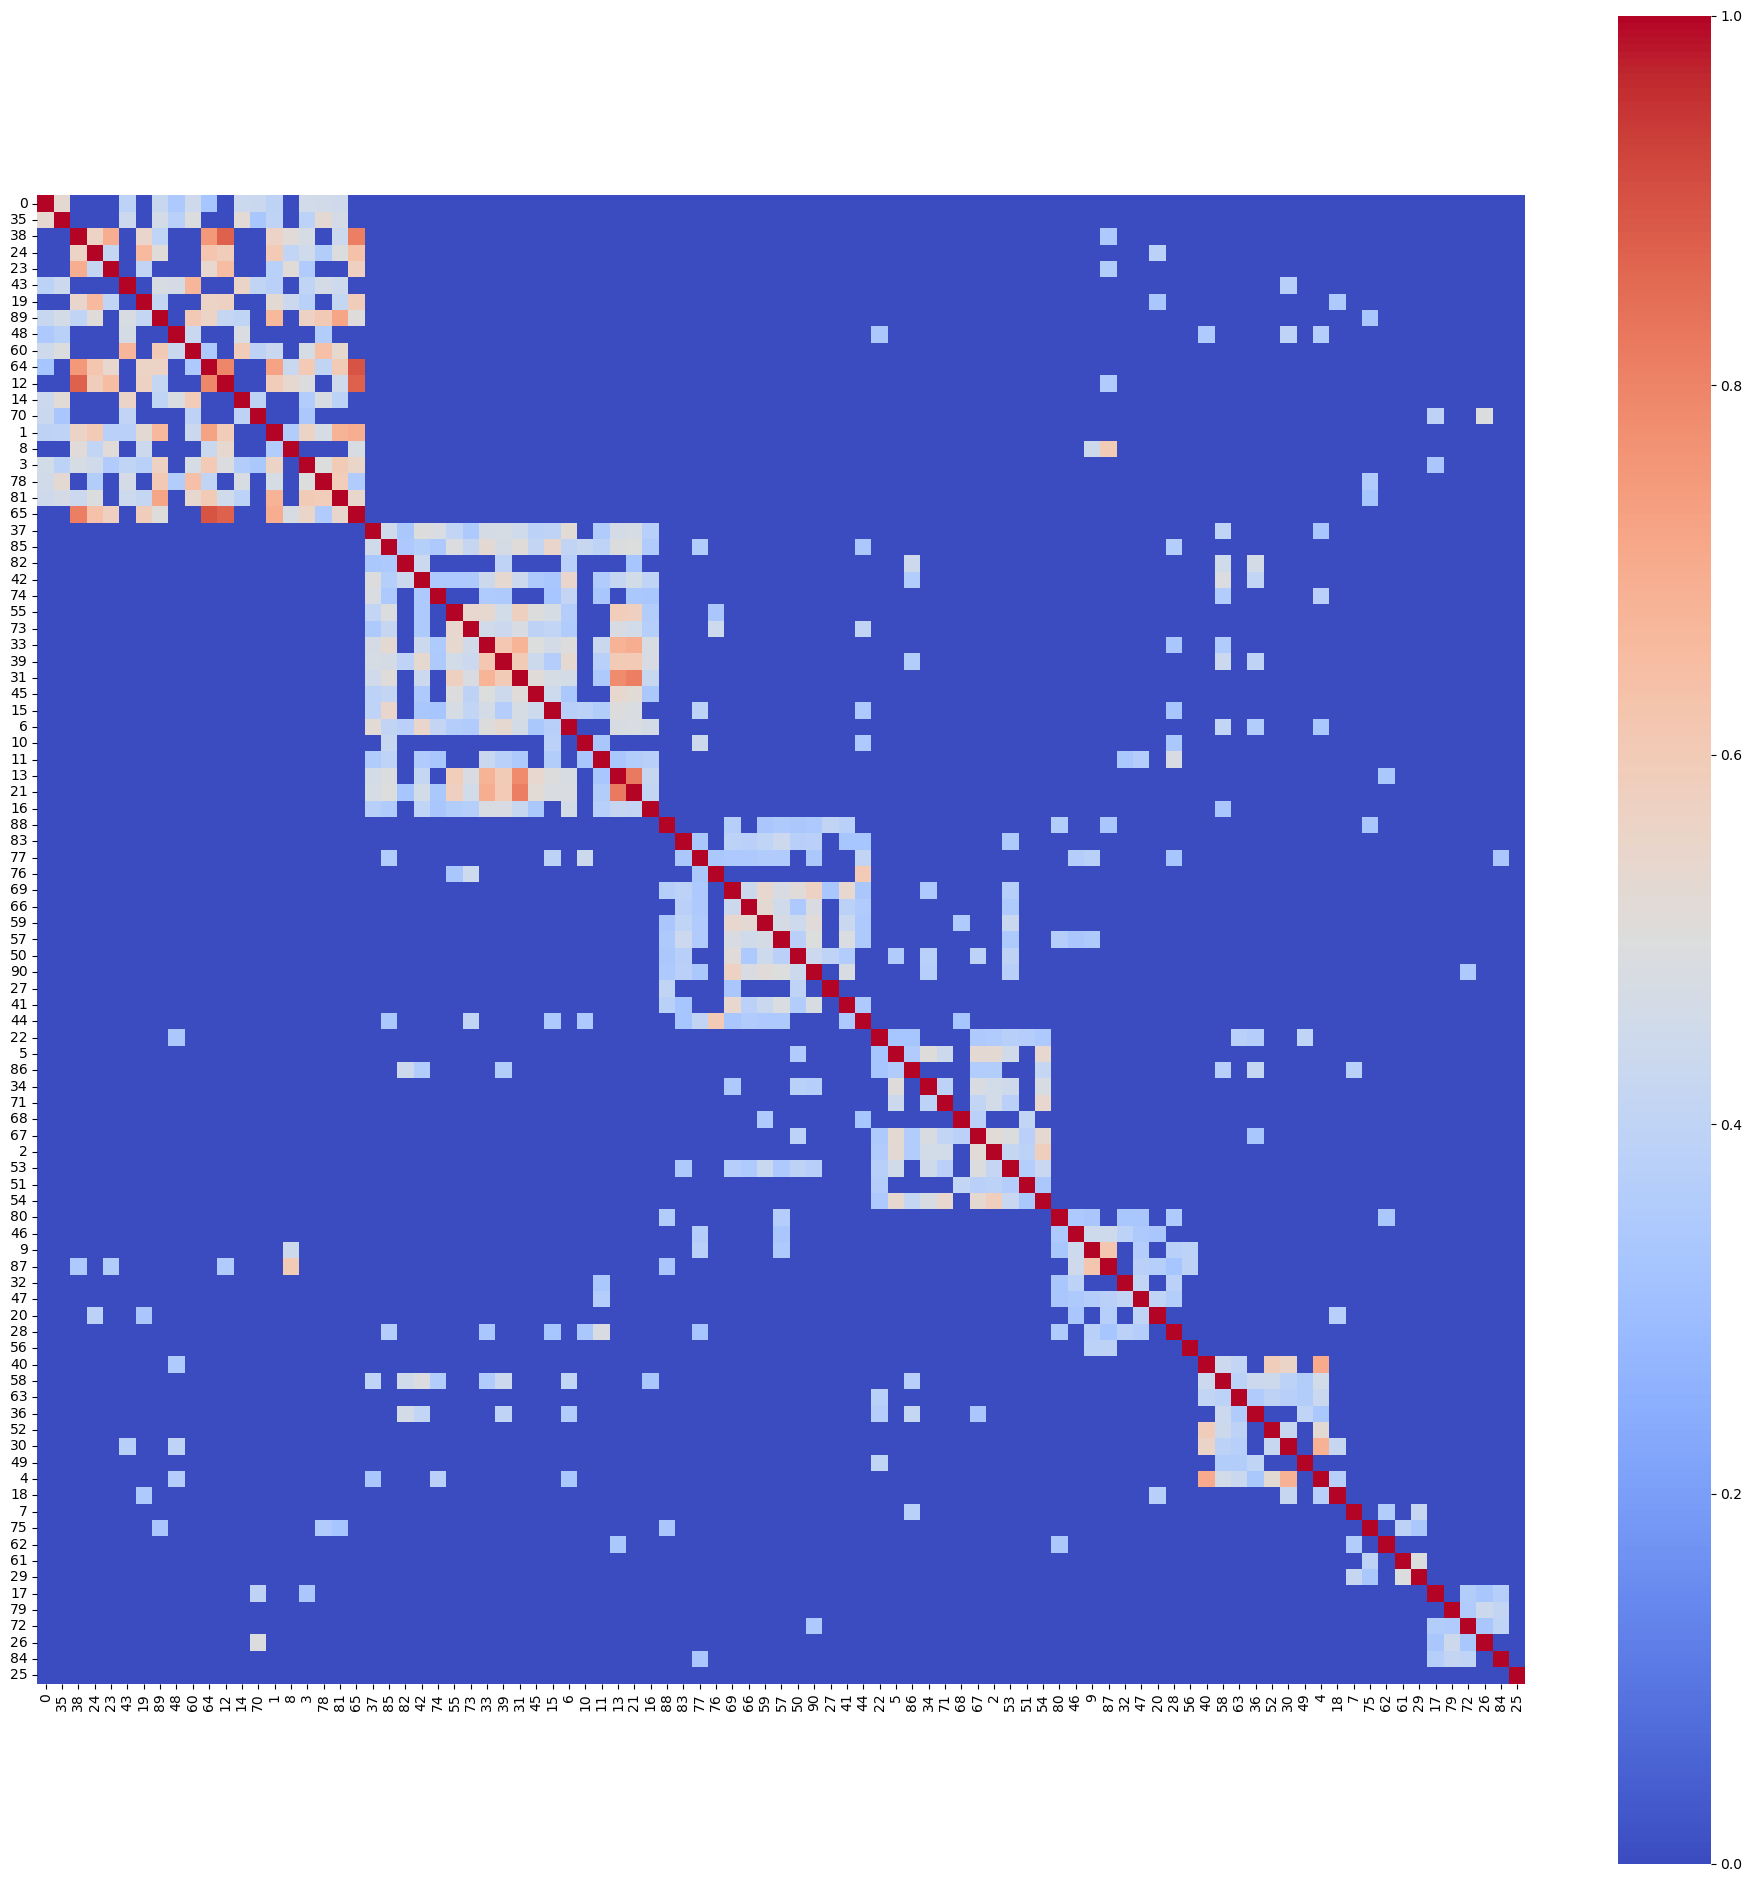

In [13]:
# reaarange the nodes according to membership
membership = partition1.membership
membership_order = np.argsort(membership)
T_mean_thresh_rearrange = T_mean_thresh[membership_order,:]
T_mean_thresh_rearrange = T_mean_thresh_rearrange[:,membership_order]
#sns.heatmap(T_mean_thresh_rearrange,cmap='coolwarm')
# reaarange the nodes according to membership
# membership = partition1.membership
# membership_order = np.argsort(membership)
# T_mean_rearrange = T_mean[membership_order,:]
# T_mean_rearrange = T_mean_rearrange[:,membership_order]
# sns.heatmap(T_mean_rearrange,cmap='coolwarm')
# change the heatmap ticks according to membership order
plt.figure(figsize=(24,24))
sns.heatmap(T_mean_thresh_rearrange,cmap='coolwarm',square=True)
plt.xticks(np.arange(0.5,91.5,1),membership_order)
plt.yticks(np.arange(0.5,91.5,1),membership_order)
plt.show()

In [14]:
# calculate the strength of connection of each node; return a matrix of size 91*num_communities
def calc_strength(cor_mat,membership):
    cor_mat = np.multiply(cor_mat,1-np.eye(cor_mat.shape[0]))
    strength_mat = np.zeros((cor_mat.shape[0],max(membership)+1))
    membership = np.array(membership)
    for i in range(max(membership)+1):
        S_C = np.mean(cor_mat[:,membership==i],axis=1)
        strength_mat[:,i] = np.mean(cor_mat[:,membership==i],axis=1)
    return strength_mat
strength_mat = calc_strength(T_mean,partition1.membership)

In [15]:
def participation_coef(cor_mat,membership):
    strength_mat = calc_strength(cor_mat,membership)
    s_tot = np.sum(strength_mat,axis=1) + 1e-7
    s_ratio = strength_mat/s_tot[:,np.newaxis]
    p_coef = 1-np.sum(np.power(s_ratio,2),axis=1)
    return p_coef
p_coef = participation_coef(T_mean,partition1.membership)

In [16]:
def intra_community_strength(cor_mat,membership):
    strength_mat = calc_strength(cor_mat,membership)
    membership = np.array(membership)
    mean_commu_strength = np.zeros((strength_mat.shape[1],1))
    std_commu_strength = np.zeros((strength_mat.shape[1],1))    
    z_intra = np.zeros((strength_mat.shape[0],1))
    for i in range(strength_mat.shape[1]):
        mean_commu_strength[i] = np.mean(strength_mat[membership==i,i])
        std_commu_strength[i] = np.std(strength_mat[membership==i,i]) + 1e-7
    for i in range(strength_mat.shape[0]):
        membership_i = membership[i]
        z_intra[i] = (strength_mat[i,membership_i] - mean_commu_strength[membership_i])/std_commu_strength[membership_i]
    return z_intra

0.27661196809846106


<AxesSubplot:>

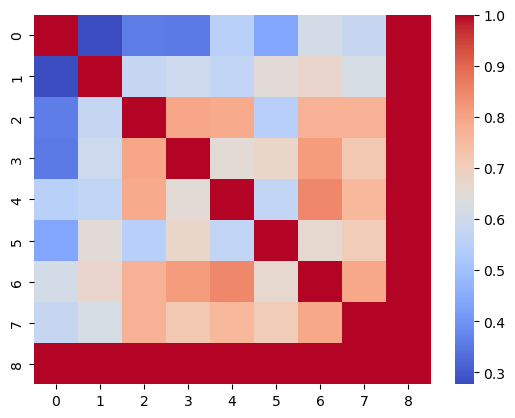

In [17]:
def between_module_connectivity(cor_mat,membership,mod1,mod2):
    cor_mat = np.multiply(cor_mat,1-np.eye(cor_mat.shape[0]))
    membership = np.array(membership)
    I_12 = np.sum(cor_mat[membership==mod1,:][:,membership==mod2])/np.sum(membership==mod1)/np.sum(membership==mod2)
    return I_12
def relative_interaction_strength(cor_mat,membership,mod1,mod2):
    I_12 = between_module_connectivity(cor_mat,membership,mod1,mod2) + 1e-7
    I_11 = between_module_connectivity(cor_mat,membership,mod1,mod1) + 1e-7
    I_22 = between_module_connectivity(cor_mat,membership,mod2,mod2) + 1e-7
    R_12 = I_12/np.sqrt(I_11*I_22)
    return R_12
print(relative_interaction_strength(T_mean,partition1.membership,0,1))
relative_interaction_mat = np.zeros((max(partition1.membership)+1,max(partition1.membership)+1))
for i in range(max(partition1.membership)+1):
    for j in range(max(partition1.membership)+1):
        relative_interaction_mat[i,j] = relative_interaction_strength(T_mean,partition1.membership,i,j)
sns.heatmap(relative_interaction_mat,cmap='coolwarm',vmax = 1)

In [18]:
z_intra = intra_community_strength(T_mean,partition1.membership)

# web view of z_intra
https://scalablebrainatlas.incf.org/services/view3d_l2v.php?template=MERetal14_on_F99&space=F99&mesh=ctxL&deform=inflated&l2v=%7B%22SUB%22%3A+0%2C+%22TEOm%22%3A+2%2C+%2213%22%3A+0%2C+%22TEpd%22%3A+1%2C+%22LB%22%3A+2%2C+%2211%22%3A+0%2C+%227B%22%3A+0%2C+%22F5%22%3A+0%2C+%22V3A%22%3A+-2%2C+%22V6A%22%3A+2%2C+%2231%22%3A+-3%2C+%22VIP%22%3A+-2%2C+%22V3%22%3A+1%2C+%22F1%22%3A+2%2C+%22STPi%22%3A+-1%2C+%2223%22%3A+0%2C+%22AIP%22%3A+0%2C+%22TEpv%22%3A+-3%2C+%22SII%22%3A+-2%2C+%22V4t%22%3A+0%2C+%22MST%22%3A+0%2C+%223%22%3A+2%2C+%22TEav%22%3A+-2%2C+%22V1%22%3A+-2%2C+%22MT%22%3A+1%2C+%22ProSt%22%3A+0%2C+%22PERI%22%3A+0%2C+%229-46v%22%3A+-2%2C+%22MIP%22%3A+0%2C+%2244%22%3A+-2%2C+%22PBc%22%3A+1%2C+%221%22%3A+2%2C+%227A%22%3A+1%2C+%225%22%3A+3%2C+%2210%22%3A+1%2C+%22TEam-a%22%3A+0%2C+%22OPRO%22%3A+-2%2C+%227op%22%3A+0%2C+%22V2%22%3A+0%2C+%222%22%3A+2%2C+%22Core%22%3A+2%2C+%229-46d%22%3A+0%2C+%22ProM%22%3A+0%2C+%22STPc%22%3A+0%2C+%2224a%22%3A+0%2C+%22F2%22%3A+0%2C+%22DP%22%3A+2%2C+%22LIP%22%3A+2%2C+%22PBr%22%3A+-3%2C+%22PIR%22%3A+-2%2C+%2246v%22%3A+1%2C+%22OPAI%22%3A+-1%2C+%22MB%22%3A+0%2C+%2232%22%3A+3%2C+%2212%22%3A+0%2C+%22F3%22%3A+0%2C+%22V6%22%3A+-2%2C+%228B%22%3A+1%2C+%22INS%22%3A+-1%2C+%2224c%22%3A+2%2C+%22PGa%22%3A+0%2C+%2245B%22%3A+-3%2C+%22F4%22%3A+-1%2C+%22Pi%22%3A+0%2C+%22TEO%22%3A+2%2C+%22V4%22%3A+2%2C+%22F6%22%3A+0%2C+%2214%22%3A+2%2C+%2225%22%3A+-1%2C+%2246d%22%3A+3%2C+%22TEad%22%3A+-3%2C+%2245A%22%3A+-1%2C+%22STPr%22%3A+0%2C+%2224d%22%3A+0%2C+%22TPt%22%3A+-3%2C+%228l%22%3A+-2%2C+%2224b%22%3A+-3%2C+%2229-30%22%3A+-1%2C+%22IPa%22%3A+0%2C+%22ENTO%22%3A+1%2C+%228m%22%3A+0%2C+%22TEam-p%22%3A+2%2C+%22Gu%22%3A+-1%2C+%22F7%22%3A+-1%2C+%22TH-TF%22%3A+2%2C+%227m%22%3A+0%2C+%22POLE%22%3A+-2%2C+%22PIP%22%3A+2%2C+%228r%22%3A+-1%2C+%22FST%22%3A+2%2C+%229%22%3A+2%7D&clim=%5B-6%2C6%5D&bg=%5B1000%2C1000%2C1000%5D&width=800&height=800&cam=L&overlay=values&format=xhtml

<AxesSubplot:ylabel='Count'>

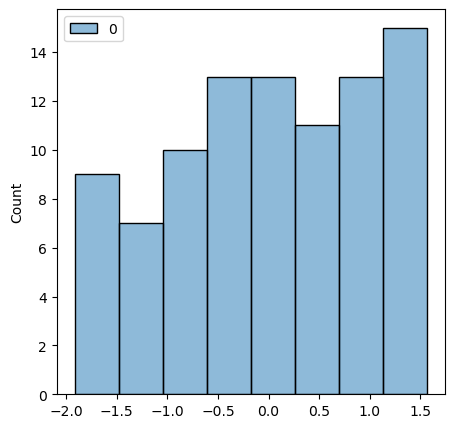

In [19]:
plt.figure(figsize=(5,5))
sns.histplot(z_intra)

<AxesSubplot:ylabel='Count'>

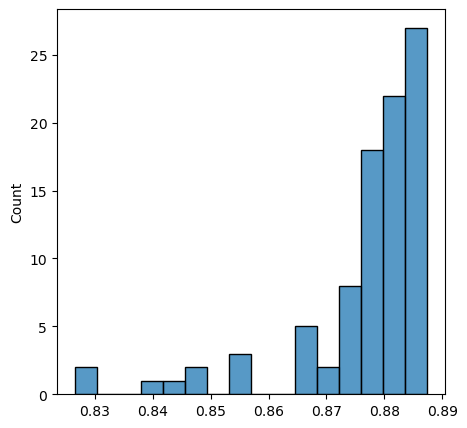

In [20]:
plt.figure(figsize=(5,5))
sns.histplot(p_coef)

<AxesSubplot:ylabel='Count'>

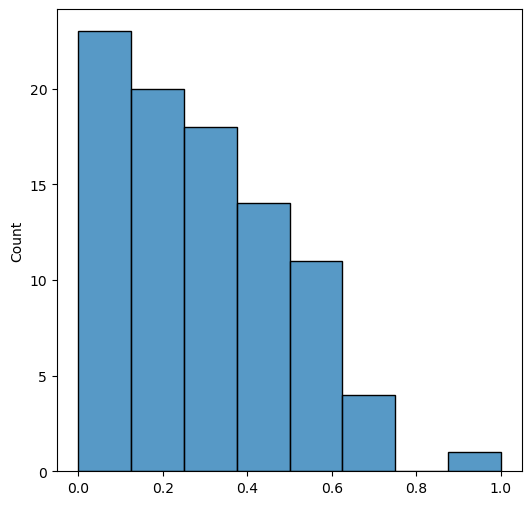

In [21]:
p_coef_thresh = participation_coef(T_mean_thresh,partition1.membership)
plt.figure(figsize=(6,6))
sns.histplot(p_coef_thresh)

Text(0, 0.5, 'intra-community strength')

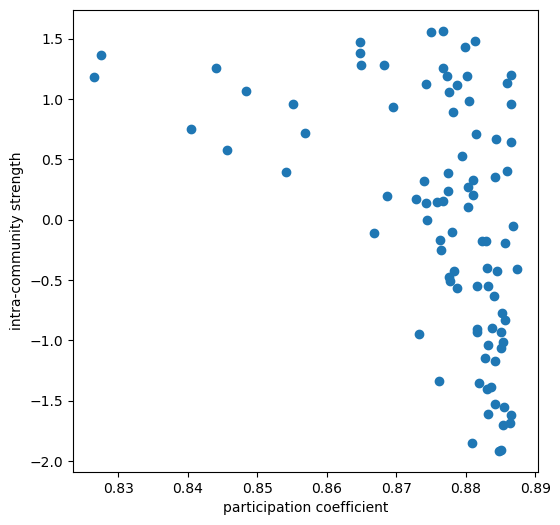

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(p_coef,z_intra)
plt.xlabel('participation coefficient')
plt.ylabel('intra-community strength')

In [23]:
p_coef_dict = fmri_seq.visualize_single([int(x*2) for x in z_intra])
fmri_seq.print_membership_dicts([p_coef_dict])

{"SUB": 0, "TEOm": 2, "13": 2, "TEpd": 1, "LB": 3, "11": 1, "7B": 0, "F5": 0, "V3A": -2, "V6A": 2, "31": -3, "VIP": -2, "V3": 1, "F1": 2, "STPi": -1, "23": 0, "AIP": -1, "TEpv": -3, "SII": -3, "V4t": 0, "MST": -1, "3": 2, "TEav": -2, "V1": -1, "MT": 0, "ProSt": 0, "PERI": 0, "9-46v": -2, "MIP": 0, "44": 2, "PBc": 1, "1": 2, "7A": 0, "5": 2, "10": 0, "TEam-a": -1, "OPRO": -1, "7op": 0, "V2": 1, "2": 1, "Core": 2, "9-46d": 1, "ProM": 0, "STPc": -1, "24a": 0, "F2": 0, "DP": 1, "LIP": 0, "PBr": -3, "PIR": -2, "46v": 0, "OPAI": -1, "MB": 0, "32": 0, "12": 2, "F3": 0, "V6": -3, "8B": 1, "INS": 0, "24c": 2, "PGa": 0, "45B": 1, "F4": -3, "Pi": 0, "TEO": 2, "V4": 2, "F6": 0, "14": 2, "25": -3, "46d": 3, "TEad": -3, "45A": 0, "STPr": 0, "24d": 0, "TPt": -2, "8l": -1, "24b": -2, "29-30": -1, "IPa": 0, "ENTO": 1, "8m": -1, "TEam-p": 2, "Gu": -3, "F7": -1, "TH-TF": 2, "7m": 0, "POLE": -2, "PIP": 2, "8r": -2, "FST": 1, "9": 2}


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30316\2557524016.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p_coef_dict = fmri_seq.visualize_single([int(x*2) for x in z_intra])


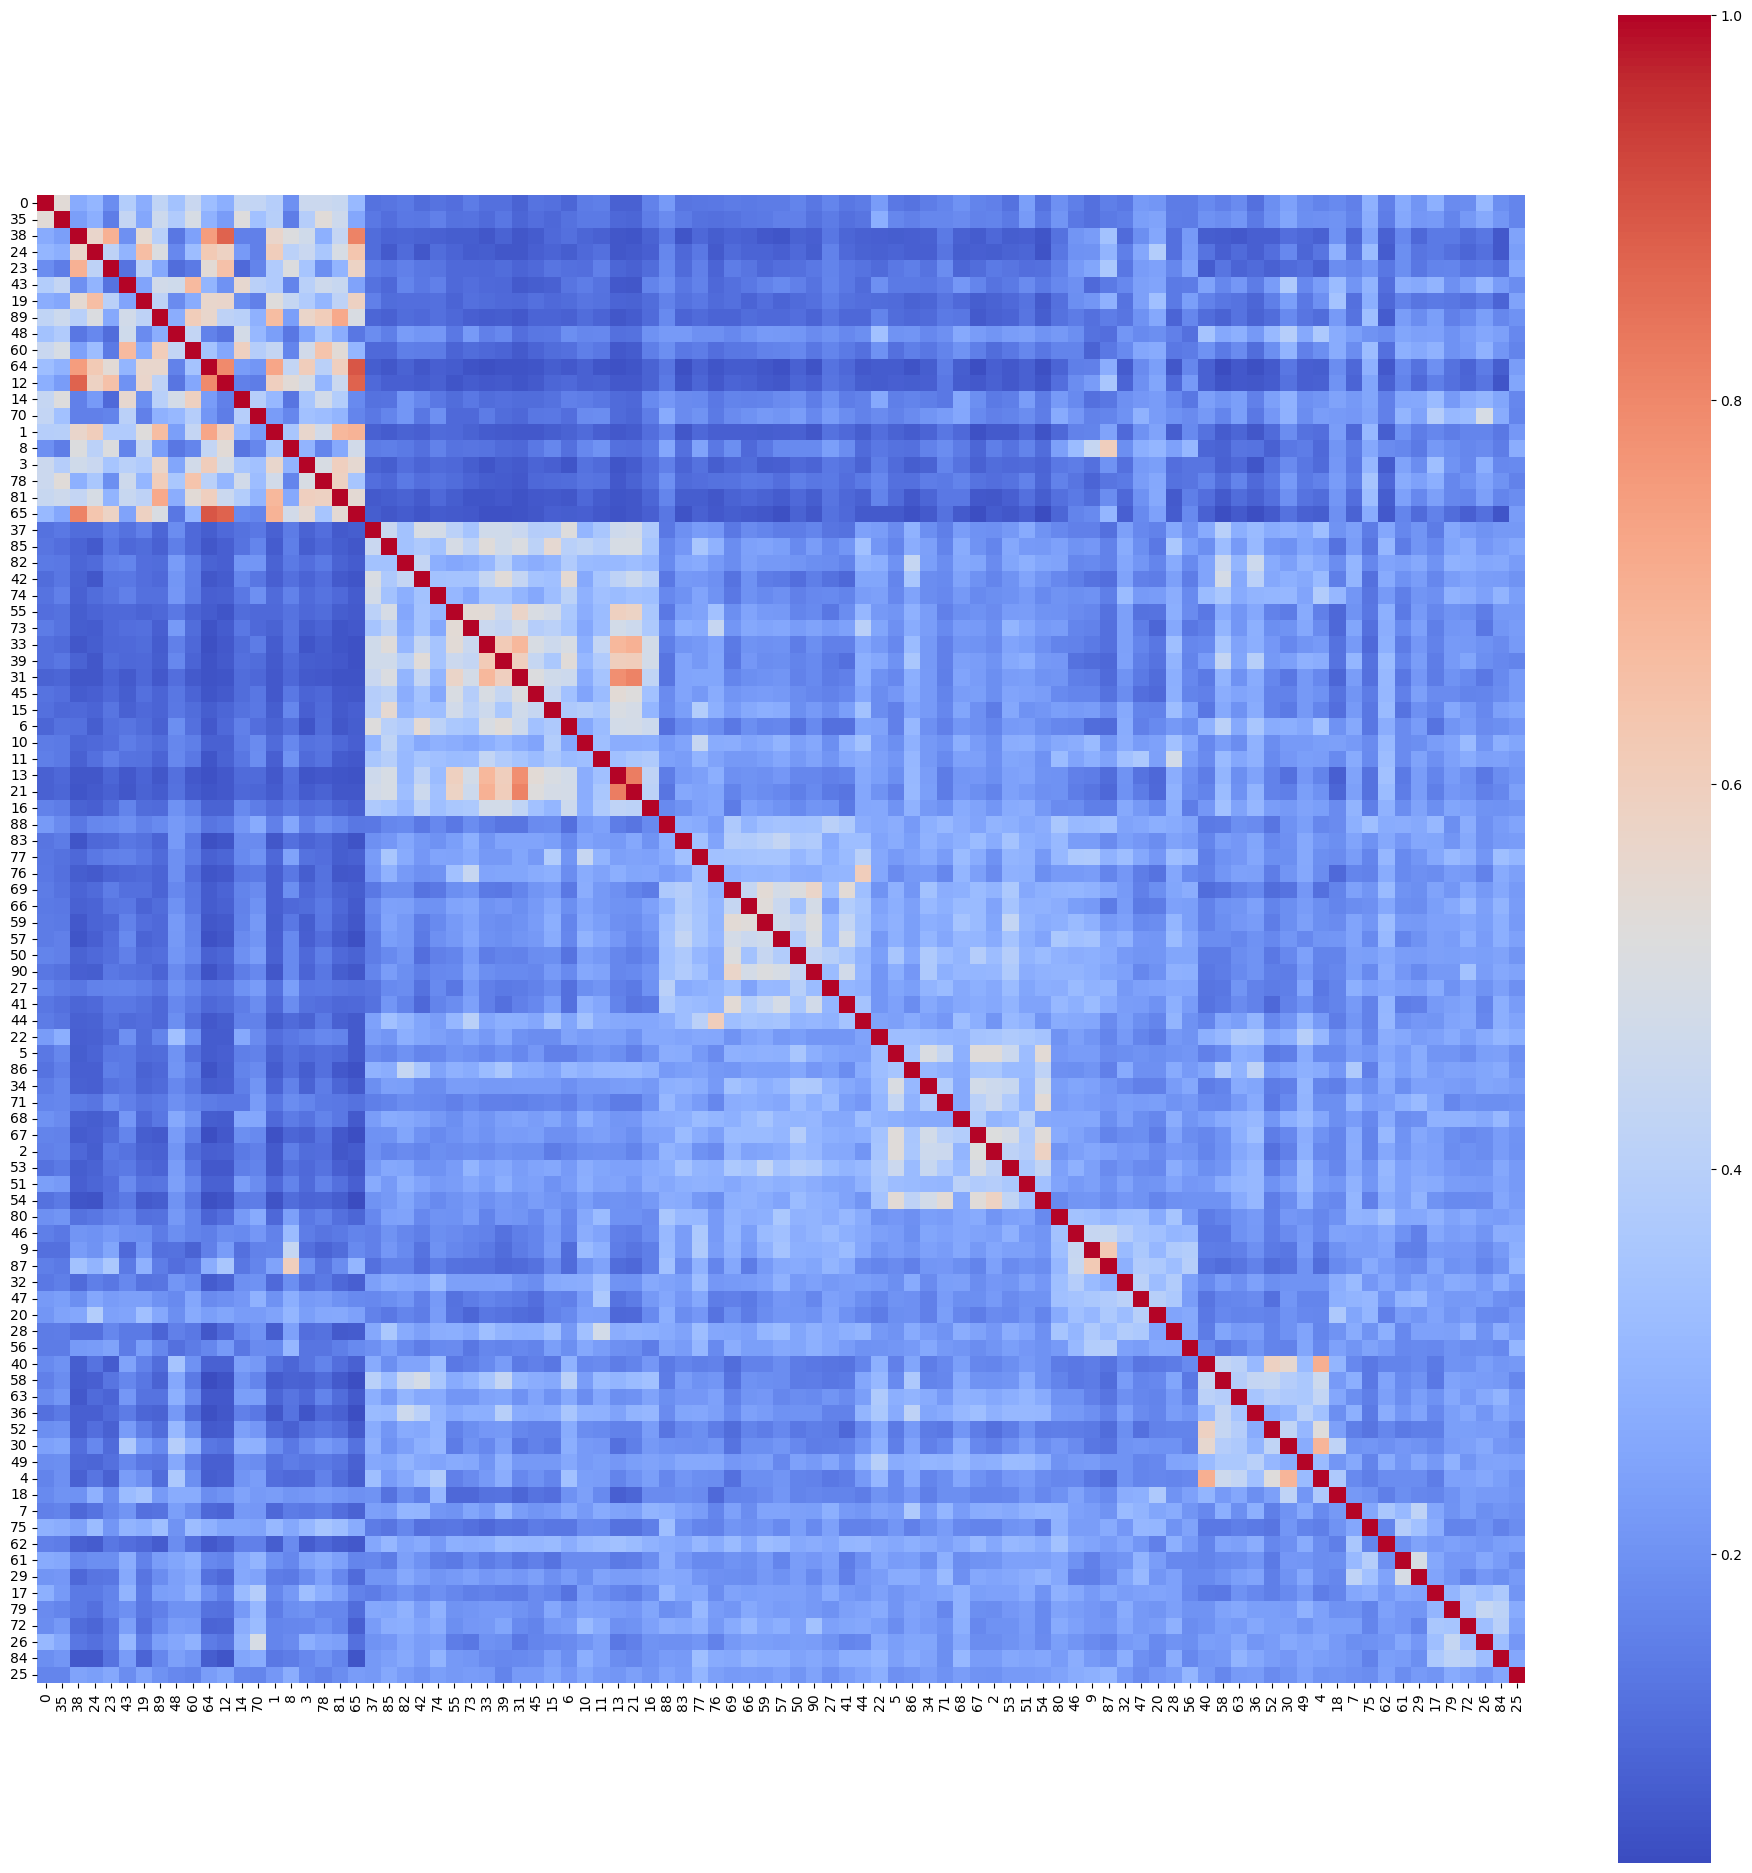

In [24]:
T_mean_rearrange = T_mean.copy()
T_mean_rearrange = T_mean_rearrange[membership_order,:]
T_mean_rearrange = T_mean_rearrange[:,membership_order]
plt.figure(figsize=(24,24))
sns.heatmap(T_mean_rearrange,cmap='coolwarm',square=True)
plt.xticks(np.arange(0.5,91.5,1),membership_order)
plt.yticks(np.arange(0.5,91.5,1),membership_order)
plt.show()

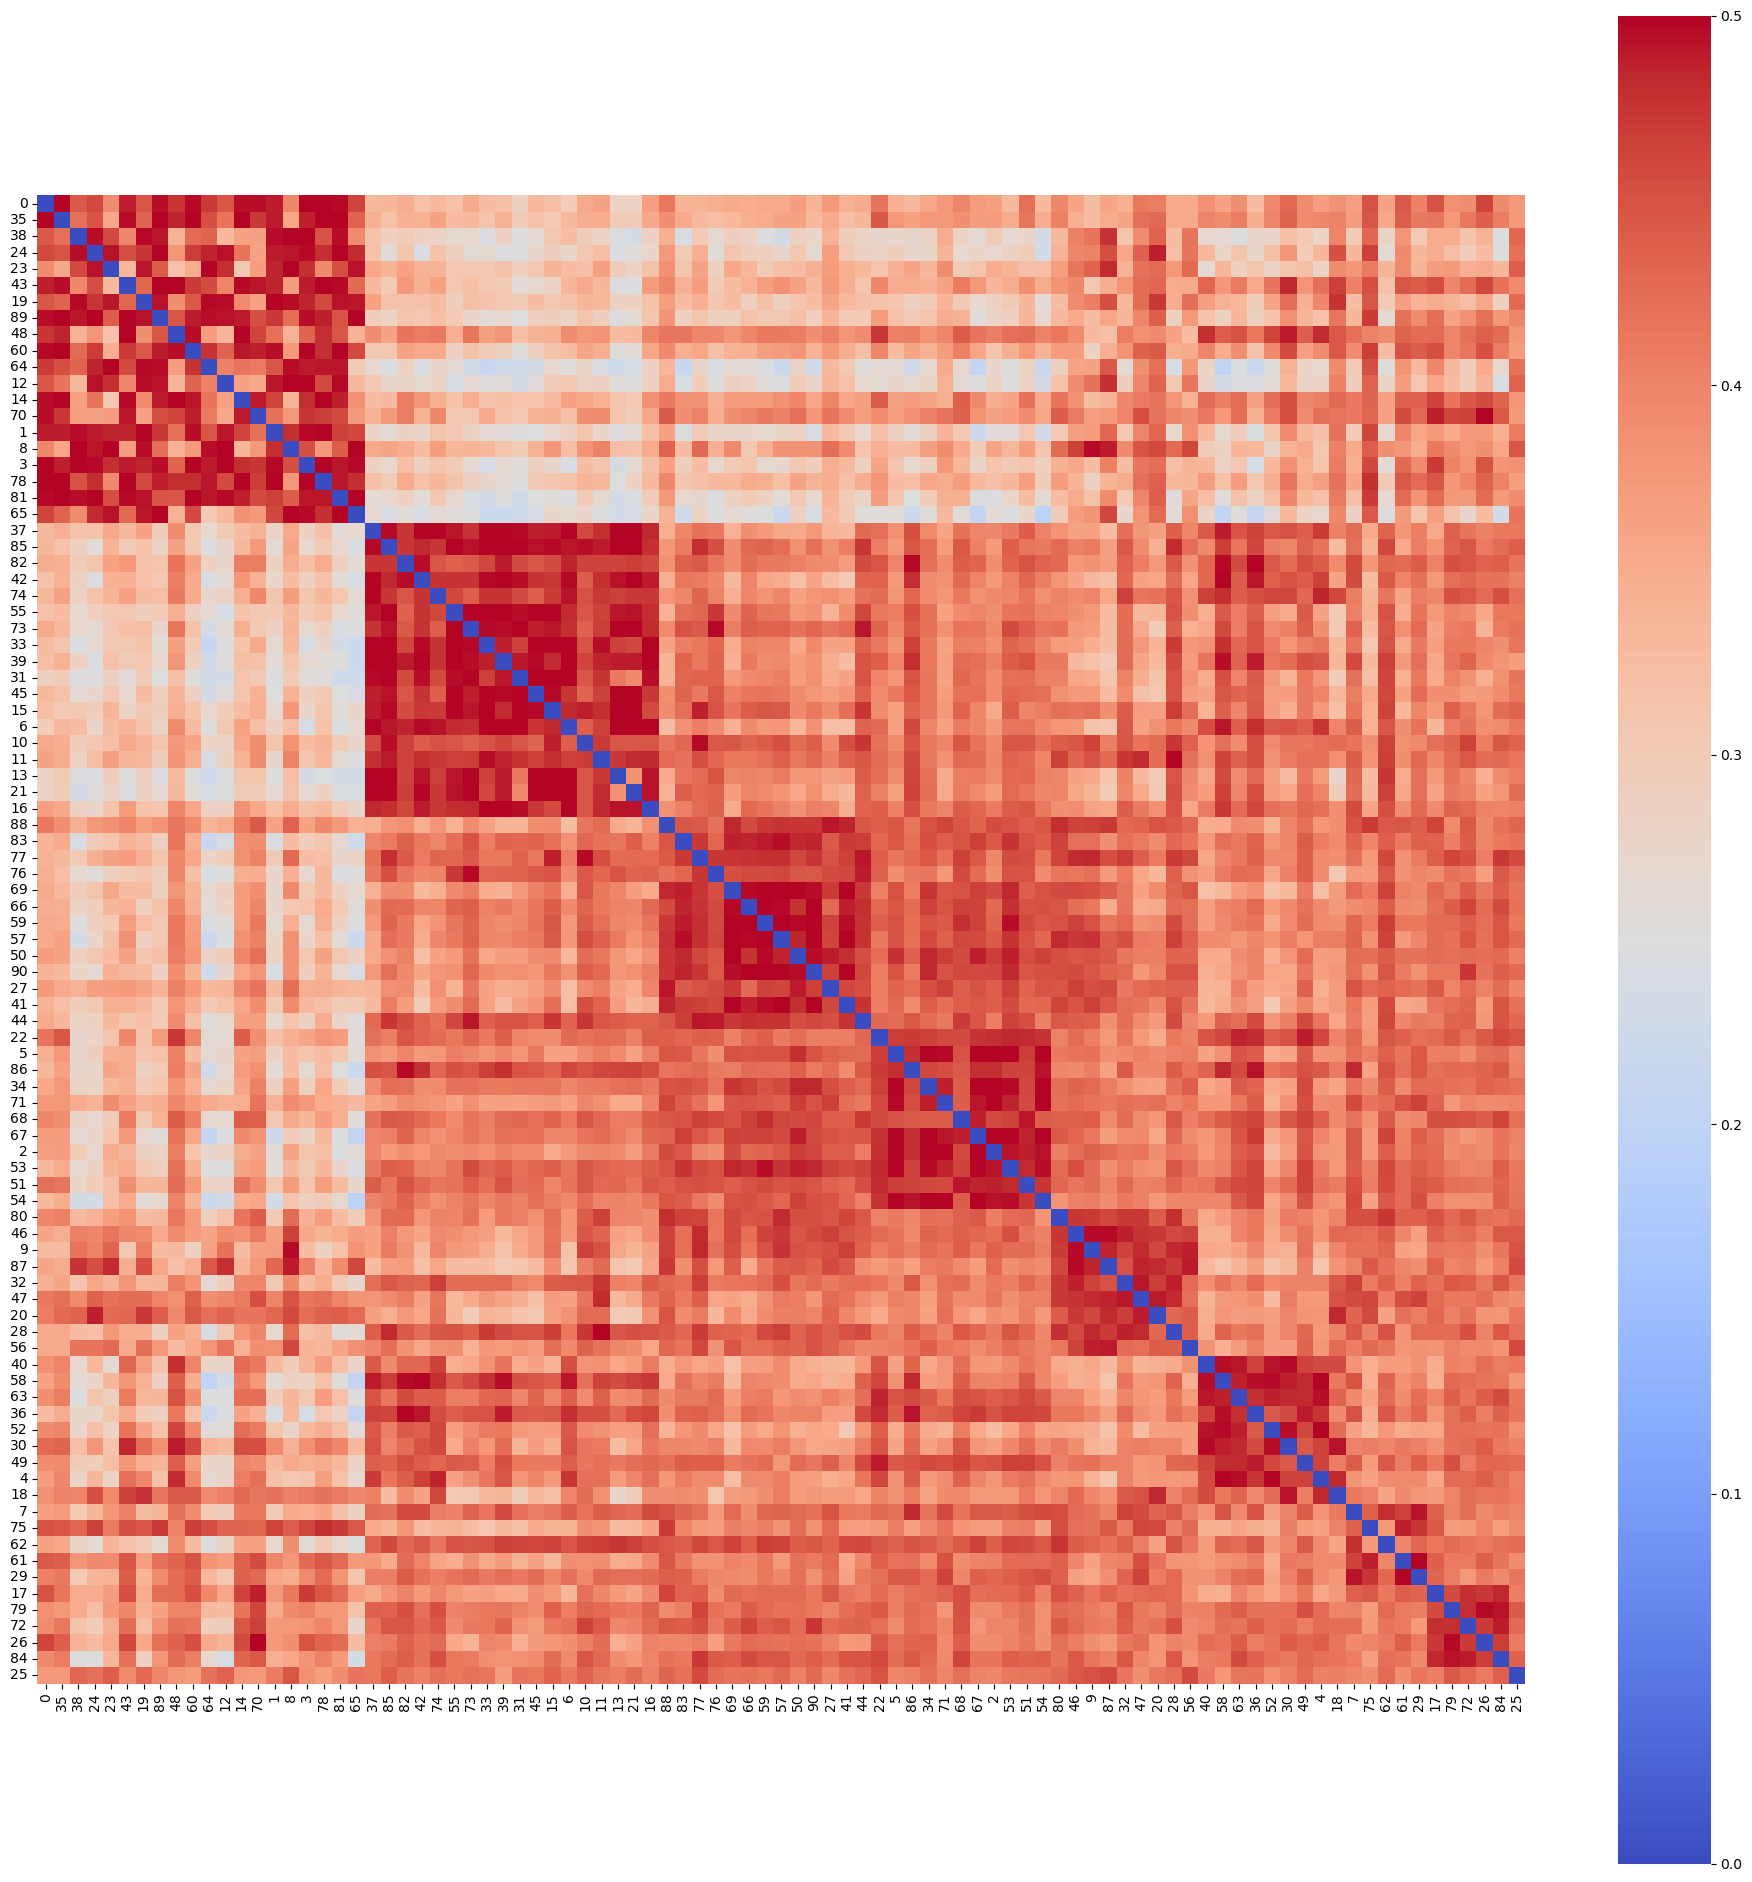

In [25]:
T_std = np.std(T_total,axis=0)
T_std_rearrange = T_std[membership_order,:]
T_std_rearrange = T_std_rearrange[:,membership_order]
plt.figure(figsize=(24,24))
sns.heatmap(T_std_rearrange,cmap='coolwarm',square=True)
plt.xticks(np.arange(0.5,91.5,1),membership_order)
plt.yticks(np.arange(0.5,91.5,1),membership_order)
plt.show()

In [26]:
# save fmri_seq.node names and their community as an excel file
import pandas as pd
node_names = fmri_seq.node_names
df = pd.DataFrame({'node_name':node_names,'community':membership})
df.to_excel('E:\\NS\\Primate fMRI\\community\\results\\l40_s20_community.xlsx')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30316\4076371935.py:1: RuntimeWarning: invalid value encountered in divide
  fc_std = np.std(fmri_seq.rcor_mats,axis = 0)/np.mean(fmri_seq.rcor_mats,axis = 0)


<AxesSubplot:>

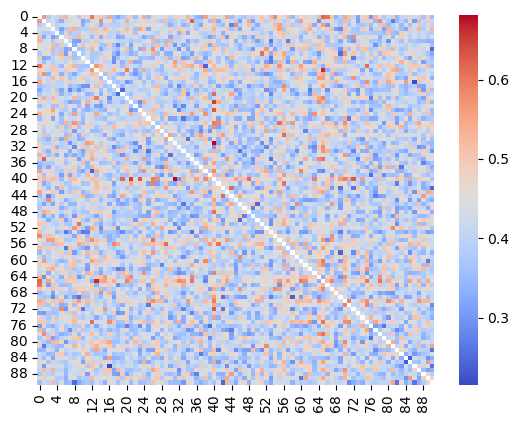

In [27]:
fc_std = np.std(fmri_seq.rcor_mats,axis = 0)/np.mean(fmri_seq.rcor_mats,axis = 0)
sns.heatmap(fc_std,cmap='coolwarm')

In [28]:
fc_std_total = []
for i in range(1,2):
    for j in range(data.shape[1]):
        data_seq = data[i,j]
        if data_seq.shape[1] < 10:
            continue
        # initialize the fMRISeq class
        fmri_seq = fMRISeq(data_seq,l_window =20,step =10)
        fmri_seq = fmri_seq.load_results('E:\\NS\\Primate fMRI\\community\\results\\l40_s20_%d_%d.pkl'%(i,j))
        fc_std = np.var(fmri_seq.rcor_mats,axis = 0)/np.mean(fmri_seq.rcor_mats,axis = 0)
        fc_std_total.append(fc_std)
fc_std_stack = np.stack(fc_std_total)
fc_std = np.mean(fc_std_stack,axis=0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30316\1571743874.py:10: RuntimeWarning: invalid value encountered in divide
  fc_std = np.var(fmri_seq.rcor_mats,axis = 0)/np.mean(fmri_seq.rcor_mats,axis = 0)


<AxesSubplot:>

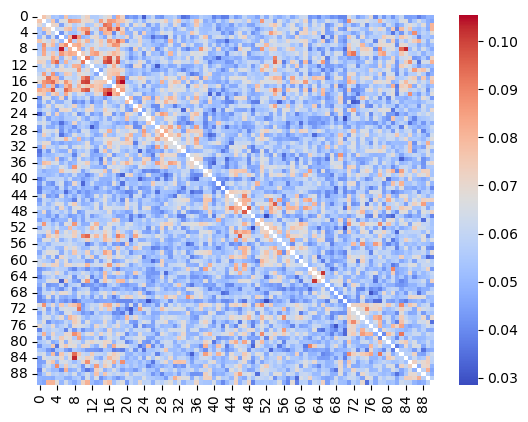

In [29]:
fc_std_rearrange = fc_std[membership_order,:]
fc_std_rearrange = fc_std_rearrange[:,membership_order]
sns.heatmap(fc_std_rearrange,cmap='coolwarm')

In [30]:
print(*membership_order,sep=',')

0,35,38,24,23,43,19,89,48,60,64,12,14,70,1,8,3,78,81,65,37,85,82,42,74,55,73,33,39,31,45,15,6,10,11,13,21,16,88,83,77,76,69,66,59,57,50,90,27,41,44,22,5,86,34,71,68,67,2,53,51,54,80,46,9,87,32,47,20,28,56,40,58,63,36,52,30,49,4,18,7,75,62,61,29,17,79,72,26,84,25


<AxesSubplot:ylabel='Count'>

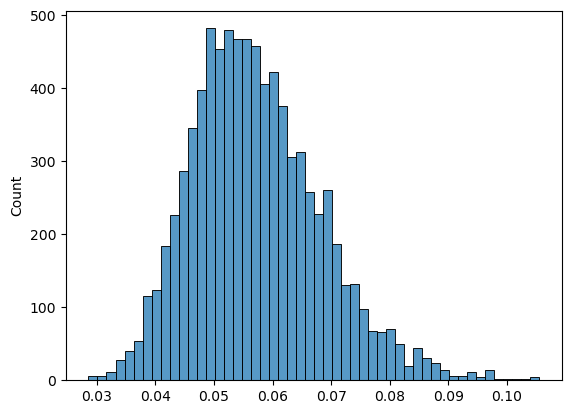

In [31]:
sns.histplot(fc_std.flatten(),bins=50)

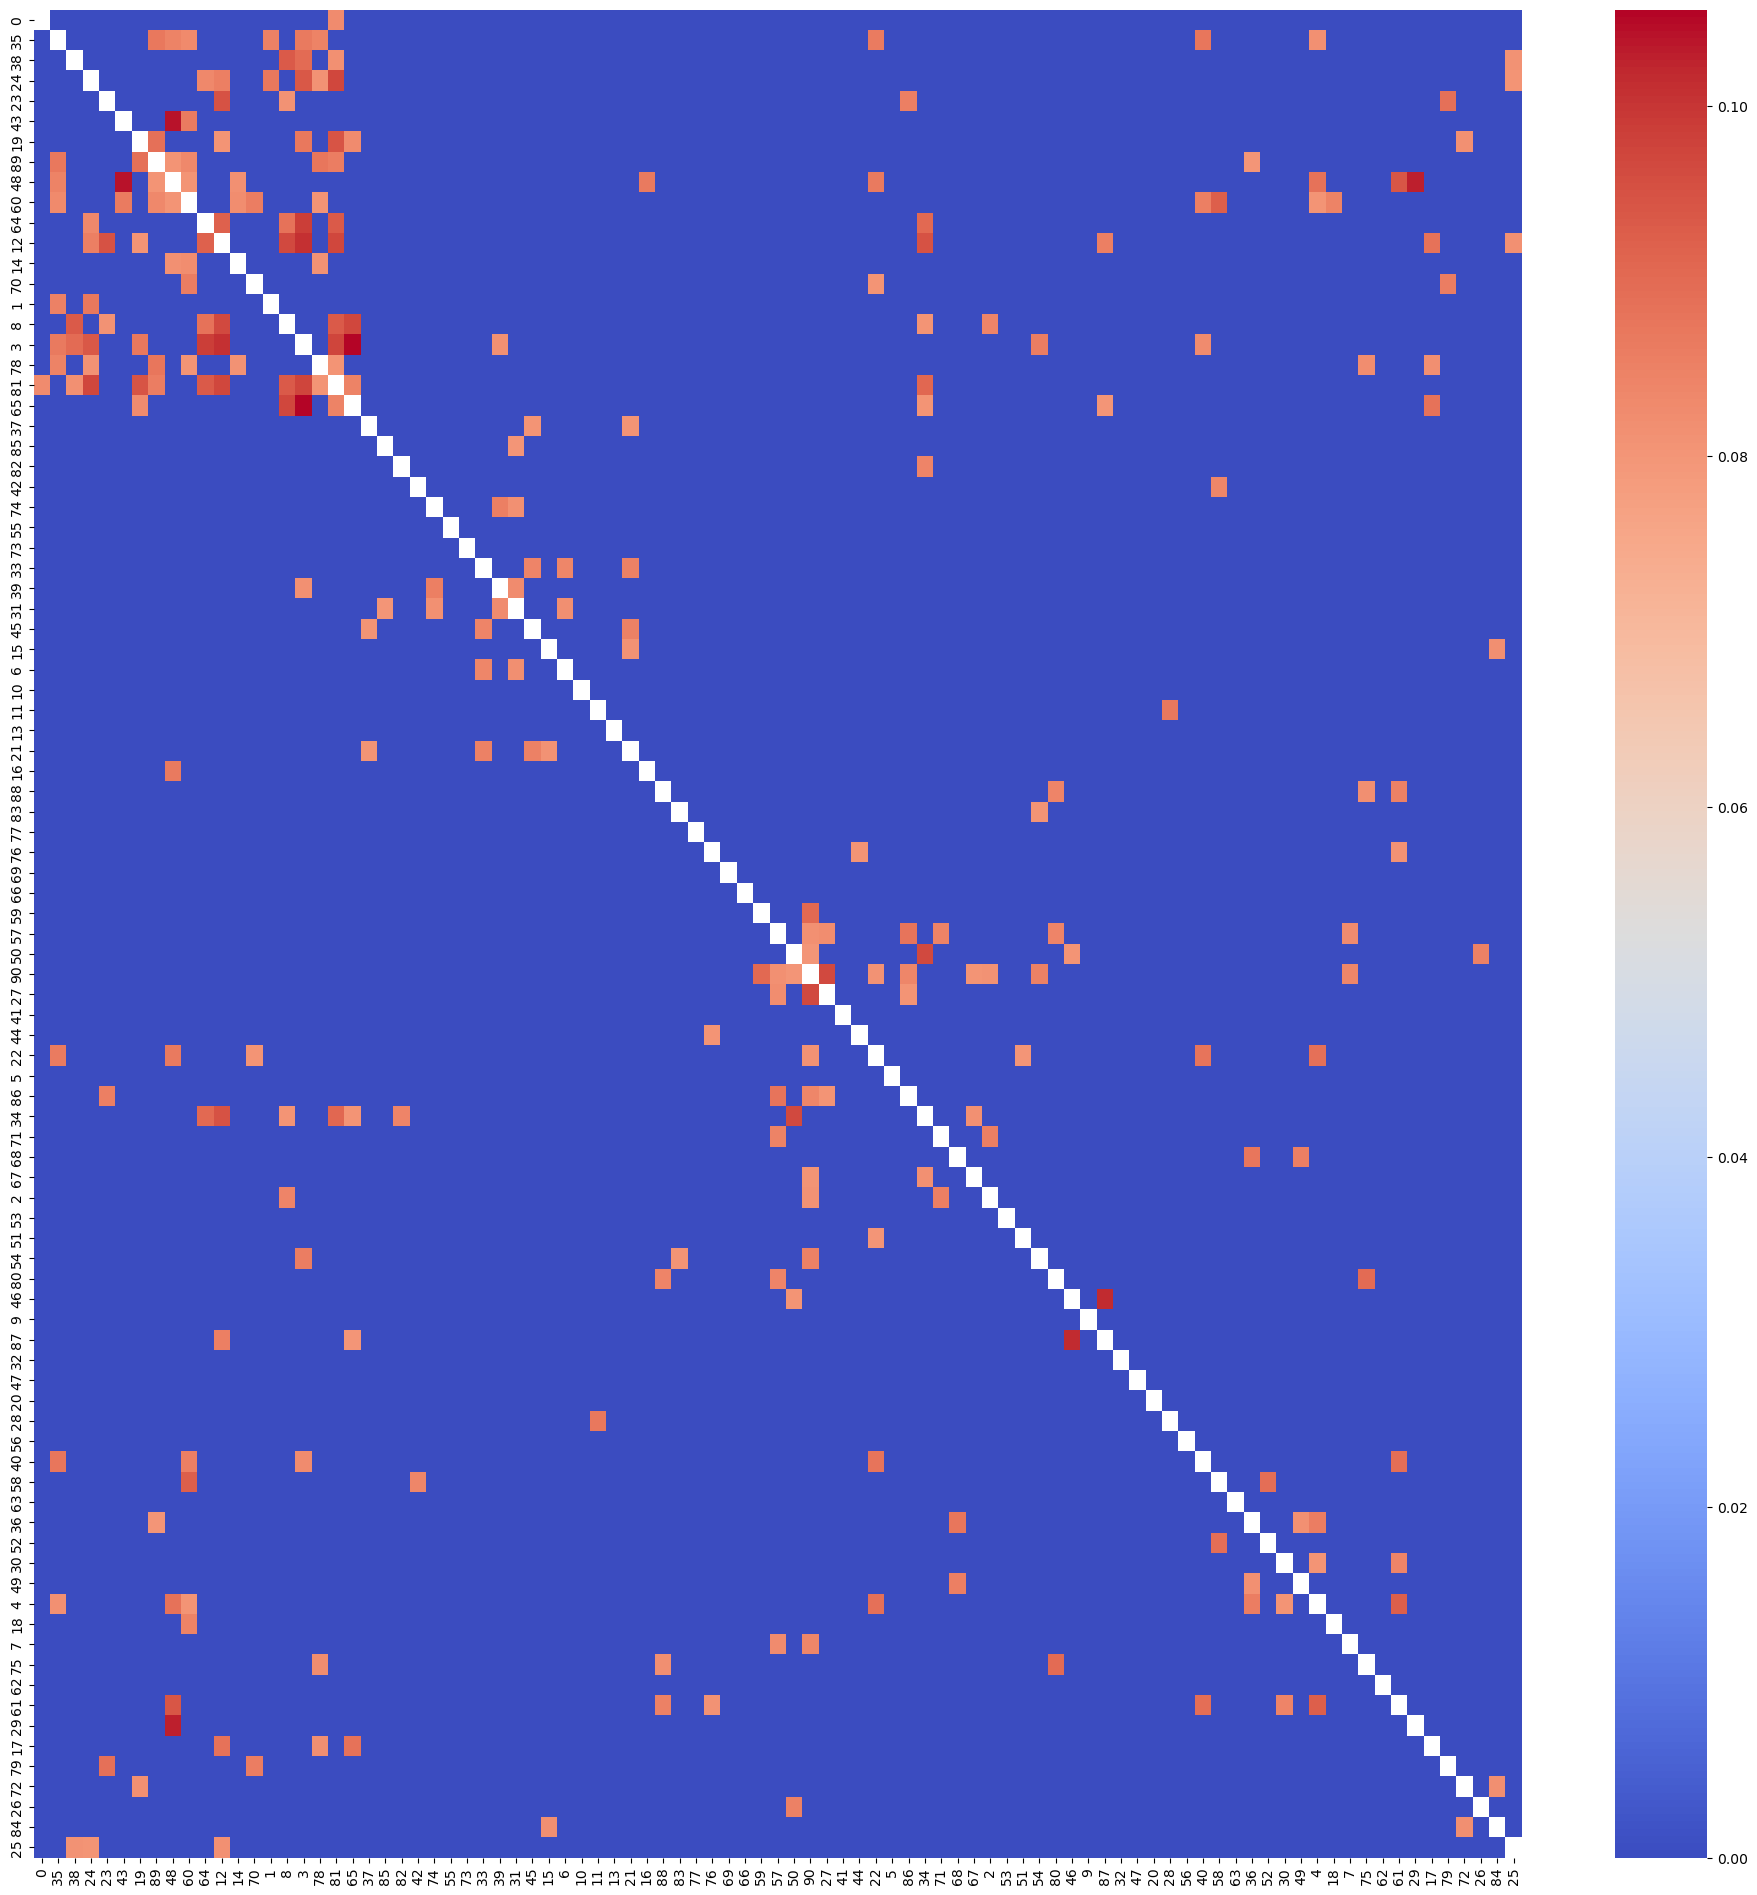

In [32]:
# set a threshold for fc_std
fc_std_thresh = fc_std_rearrange.copy()
fc_std_thresh[fc_std_thresh<0.08] = 0
plt.figure(figsize=(24,24))
sns.heatmap(fc_std_thresh,cmap='coolwarm')
plt.xticks(np.arange(0.5,91.5,1),membership_order)
plt.yticks(np.arange(0.5,91.5,1),membership_order)
plt.show()

Text(0, 0.5, 'T_mean')

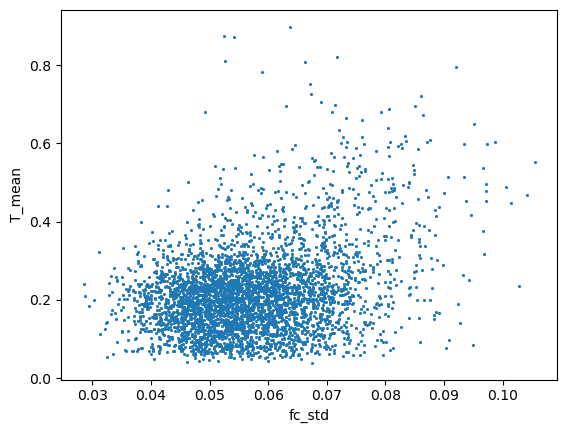

In [33]:
plt.scatter(fc_std.flatten(),T_mean.flatten(),s=1)
plt.xlabel('fc_std')
plt.ylabel('T_mean')

In [34]:
# calculate n_switch
# n_switch和动态FC的关系是由算法决定的 处在静态FC边缘的社区n_switch是否会更高？
f_switch_total = []
for i in range(0,data.shape[0]):
    for j in range(data.shape[1]):
        data_seq = data[i,j]
        if data_seq.shape[1] < 10:
            continue
        # initialize the fMRISeq class
        fmri_seq = fMRISeq(data_seq,l_window =20,step =10)
        fmri_seq = fmri_seq.load_results('E:\\NS\\Primate fMRI\\community\\results\\l40_s20_%d_%d.pkl'%(i,j))
        #MSC_mats = fmri_seq.calc_MSC()

        #membership_array = fmri_seq.cluster_MSC(resolution_parameter = 1,pval = True,max_communities=0,seed = 8192,consider_empty_community = True)

        n_switch = fmri_seq.node_switch()
        f_switch_total.append(n_switch/(fmri_seq.n_window-1))

        #fmri_seq.save_results('E:\\NS\\Primate fMRI\\community\\results\\l40_s20_%d_%d.pkl'%(i,j))
        #print('finish %d %d'%(i,j))
f_switch_total = np.hstack(f_switch_total)


(array([ 2.,  7., 11., 14., 12., 21., 12.,  7.,  4.,  1.]),
 array([0.06139563, 0.07416392, 0.08693222, 0.09970051, 0.1124688 ,
        0.1252371 , 0.13800539, 0.15077368, 0.16354198, 0.17631027,
        0.18907857]),
 <BarContainer object of 10 artists>)

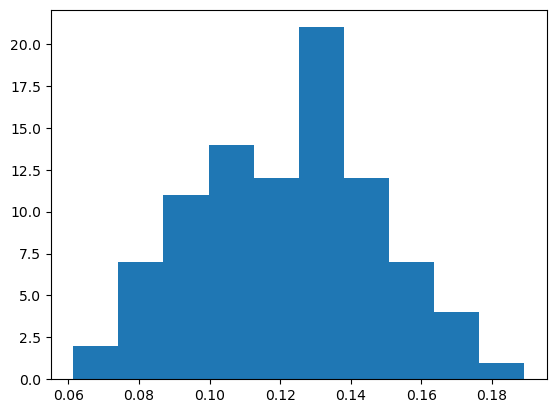

In [35]:
f_switch_mean = np.mean(f_switch_total,axis=1)
plt.hist(f_switch_mean)

Text(0, 0.5, 'participation coefficient')

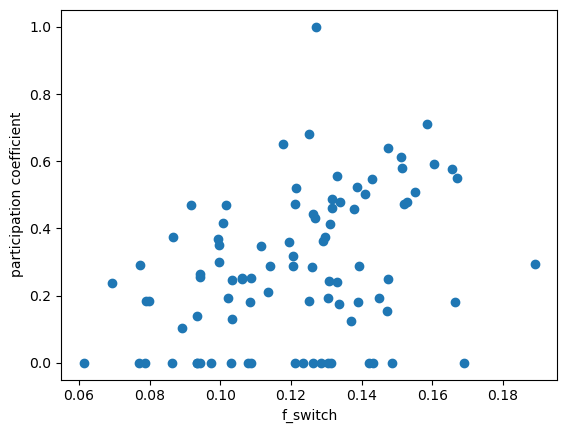

In [36]:
plt.scatter(f_switch_mean,p_coef_thresh)
plt.xlabel('f_switch')
plt.ylabel('participation coefficient')

Text(0, 0.5, 'intra-community strength')

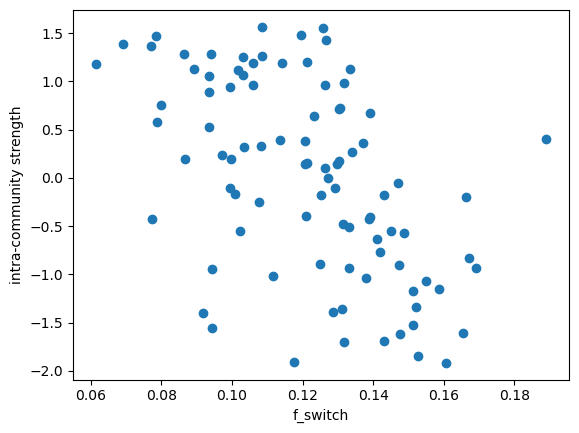

In [37]:
plt.scatter(f_switch_mean,z_intra)
plt.xlabel('f_switch')
plt.ylabel('intra-community strength')

In [38]:
corr_mats_total = []
data_total = np.empty((91,1))
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data_seq = data[i,j]
        if data_seq.shape[1] < 10:
            continue
        data_total = np.hstack([data_total,data_seq])
        fmri_seq = fMRISeq(data_seq,l_window =data_seq.shape[1])
        corr_mat = fmri_seq.cal_corcoeff_mat(wavelet_transform = True,p_val = False).squeeze()
        fmri_seq.save_results('E:\\NS\\Primate fMRI\\community\\results\\ltot_pearson_%d_%d'%(i,j))
        corr_mats_total.append(corr_mat)
corr_mats_total = np.array(corr_mats_total)
corr_mats_mean = np.mean(corr_mats_total,axis=0)

<AxesSubplot:>

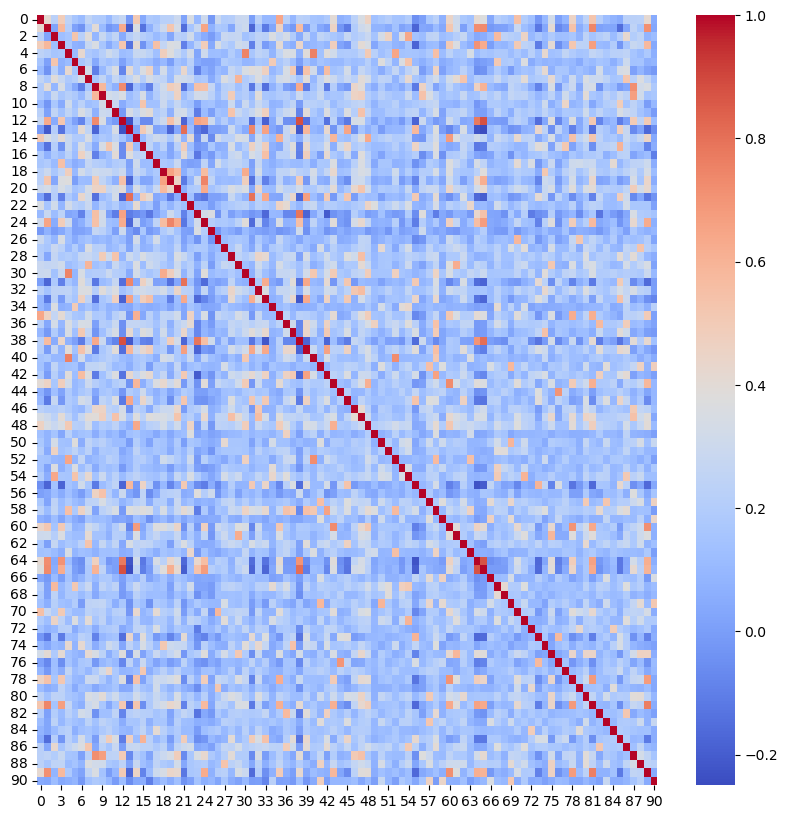

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mats_mean,cmap='coolwarm')

<AxesSubplot:>

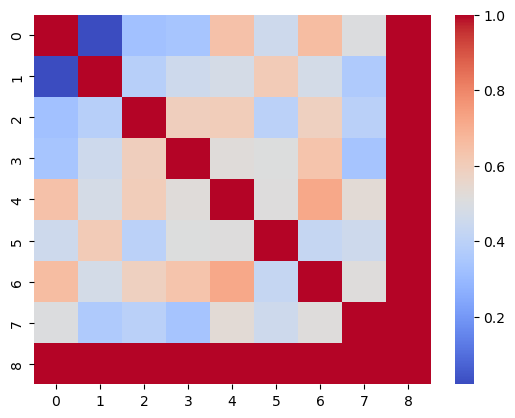

In [54]:
relative_interaction_mat_2 = np.zeros((max(partition1.membership)+1,max(partition1.membership)+1))
for i in range(max(partition1.membership)+1):
    for j in range(max(partition1.membership)+1):
        relative_interaction_mat_2[i,j] = relative_interaction_strength(corr_mats_mean,partition1.membership,i,j)
sns.heatmap(relative_interaction_mat_2,cmap='coolwarm',vmax = 1)

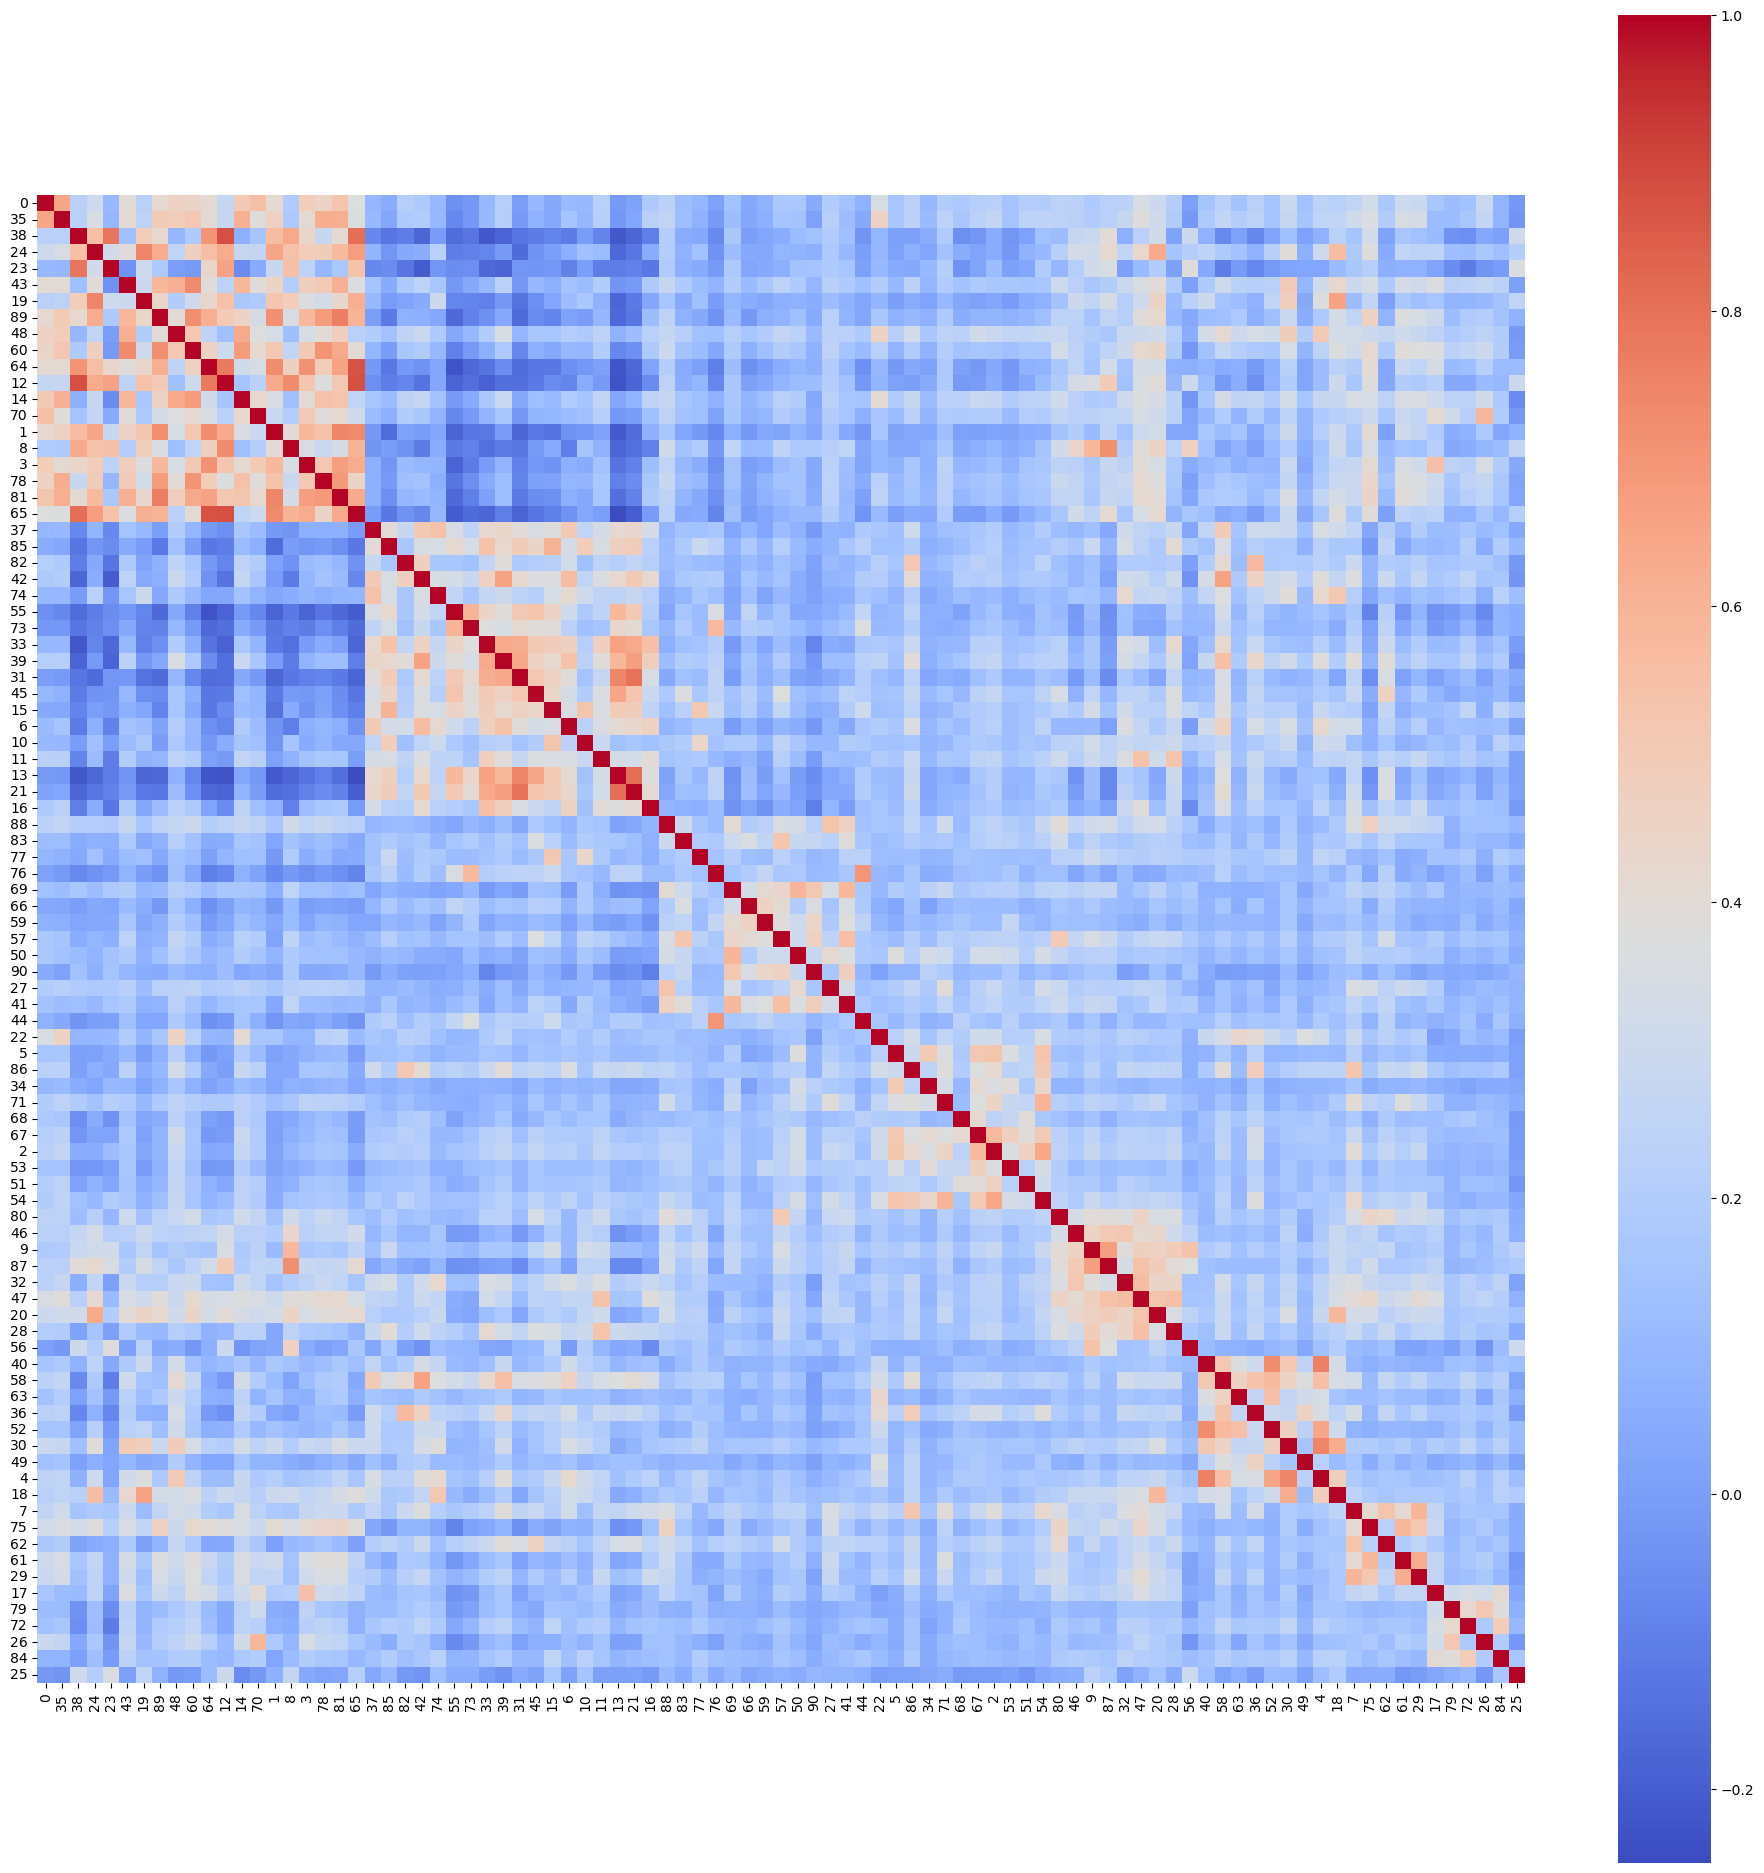

In [40]:
corr_mats_mean_rearrange = corr_mats_mean[membership_order,:]
corr_mats_mean_rearrange = corr_mats_mean_rearrange[:,membership_order]
plt.figure(figsize=(24,24))
sns.heatmap(corr_mats_mean_rearrange,cmap='coolwarm',square=True)
plt.xticks(np.arange(0.5,91.5,1),membership_order)
plt.yticks(np.arange(0.5,91.5,1),membership_order)
plt.show()

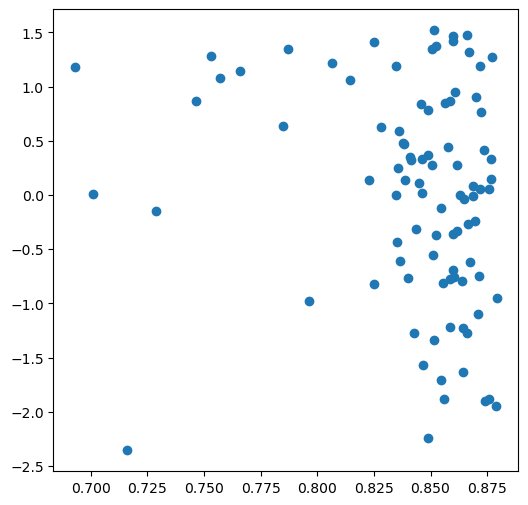

In [41]:
z_intra_FC = intra_community_strength(corr_mats_mean,partition1.membership)
p_coef_FC = participation_coef(corr_mats_mean,partition1.membership)
plt.figure(figsize=(6,6))
plt.scatter(p_coef_FC,z_intra_FC)

Text(0, 0.5, 'intra-community strength')

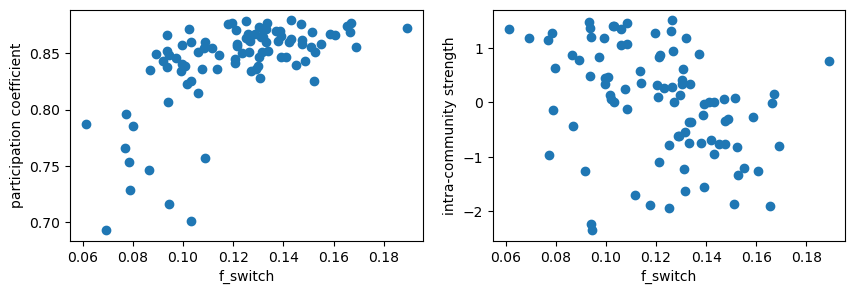

In [42]:
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
ax1.scatter(f_switch_mean,p_coef_FC)
# 理论上$P \propto f$
ax1.set_xlabel('f_switch')
ax1.set_ylabel('participation coefficient')
ax2 = plt.subplot(1,2,2)
ax2.scatter(f_switch_mean,z_intra_FC)
ax2.set_xlabel('f_switch')
ax2.set_ylabel('intra-community strength')

Text(0, 0.5, 'sum-max')

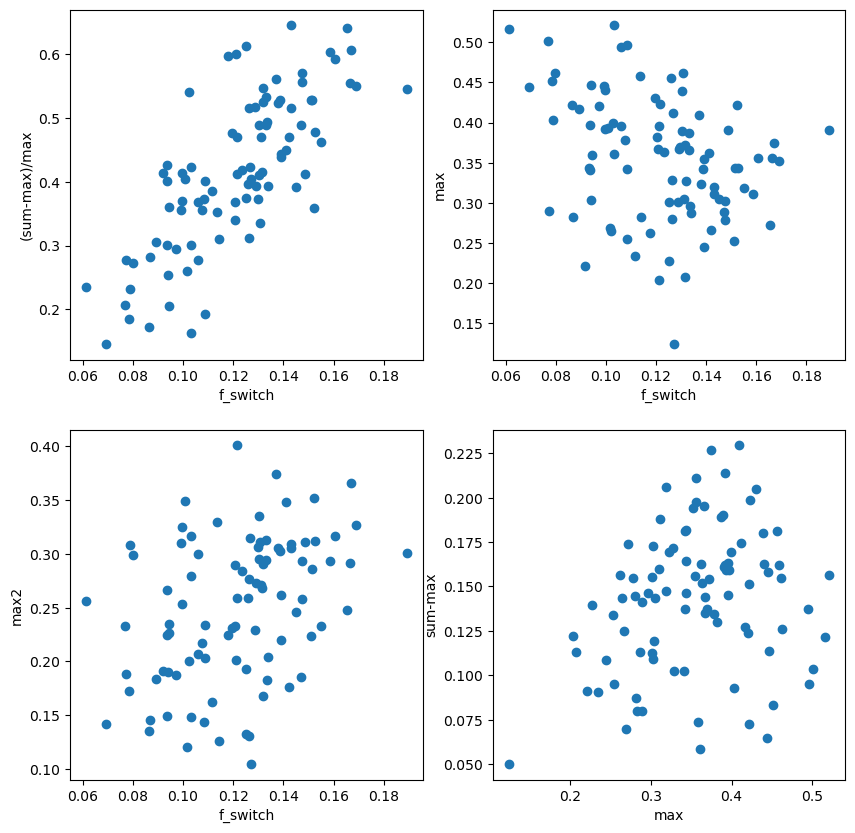

In [43]:
strength_mat_FC =calc_strength(corr_mats_mean,partition1.membership)
strength_max = np.max(strength_mat_FC,axis=1)
strength_max2 = np.mean(np.sort(strength_mat_FC,axis =1)[:,:-1],axis=1)
max2_max1 = strength_max2/strength_max # hubs?
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.scatter(f_switch_mean,max2_max1)
ax1.set_xlabel('f_switch') # 算一下z
ax1.set_ylabel('(sum-max)/max')
ax2 = plt.subplot(2,2,2)
ax2.scatter(f_switch_mean,strength_max)#/np.mean(strength_mat_FC,axis=1))
ax2.set_xlabel('f_switch')
ax2.set_ylabel('max')
ax3 = plt.subplot(2,2,3)
ax3.scatter(f_switch_mean,np.sort(strength_mat_FC,axis =1)[:,-2])
ax3.set_xlabel('f_switch')
ax3.set_ylabel('max2')
ax4 = plt.subplot(2,2,4)
ax4.scatter(strength_max,strength_max2)
ax4.set_xlabel('max')
ax4.set_ylabel('sum-max')

In [44]:
# extended form of intra_community_strength: z_intra_all
def intra_community_strength_all(cor_mat,membership):
    """
    return a matrix of size (num_nodes,num_communities)

    $z_{iC_k} = \frac{S_{iC_k} - \mu_{C_k}}{\sigma_{C_k}}$
    """
    strength_mat = calc_strength(cor_mat,membership)
    membership = np.array(membership)
    mean_commu_strength = np.zeros((strength_mat.shape[1],1))
    std_commu_strength = np.zeros((strength_mat.shape[1],1))    
    z_intra = np.zeros((strength_mat.shape[0],strength_mat.shape[1]))
    for i in range(strength_mat.shape[1]):
        mean_commu_strength[i] = np.mean(strength_mat[membership==i,i])
        std_commu_strength[i] = np.std(strength_mat[membership==i,i]) 
    for i in range(strength_mat.shape[0]):
        for membership_i in range(strength_mat.shape[1]-1):
            z_intra[i,membership_i] = (strength_mat[i,membership_i] - mean_commu_strength[membership_i])/std_commu_strength[membership_i]
    return z_intra

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30316\1040964972.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z_intra[i,membership_i] = (strength_mat[i,membership_i] - mean_commu_strength[membership_i])/std_commu_strength[membership_i]


Text(0, 0.5, 'sum-max')

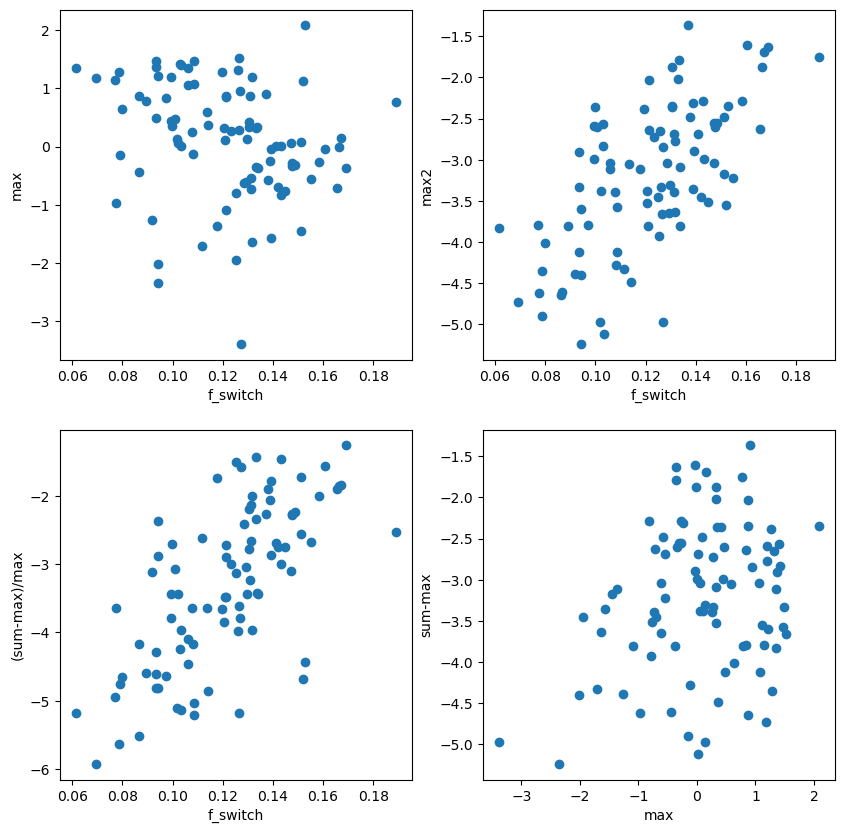

In [45]:
strength_mat_FC =intra_community_strength_all(corr_mats_mean,partition1.membership)
strength_max = np.max(strength_mat_FC[:,:-1],axis=1)
strength_max2 = np.mean(np.sort(strength_mat_FC[:,:-1],axis =1)[:,:-1],axis=1)
max2_max1 = strength_max2- strength_max # hubs?
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.scatter(f_switch_mean,strength_max)
ax1.set_xlabel('f_switch') 
ax1.set_ylabel('max')
ax2 = plt.subplot(2,2,2)
ax2.scatter(f_switch_mean,strength_max2)
ax2.set_xlabel('f_switch')
ax2.set_ylabel('max2')
ax3 = plt.subplot(2,2,3)
ax3.scatter(f_switch_mean,max2_max1)
ax3.set_xlabel('f_switch')
ax3.set_ylabel('(sum-max)/max')
ax4 = plt.subplot(2,2,4)
ax4.scatter(strength_max,strength_max2)
ax4.set_xlabel('max')
ax4.set_ylabel('sum-max')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30316\579067138.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax1.plot(f_switch_mean,reg.predict(f_switch_mean.reshape(-1,1)),label='k=%.2f,r2=%.2f'%(k,r2),linewidth=0.3,color="grey")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30316\579067138.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax2.plot(f_switch_mean,reg.predict(f_switch_mean.reshape(-1,1)),label='k=%.2f,r2=%.2f'%(k,r2),linewidth=0.3,color="grey")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30316\579067138.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in futu

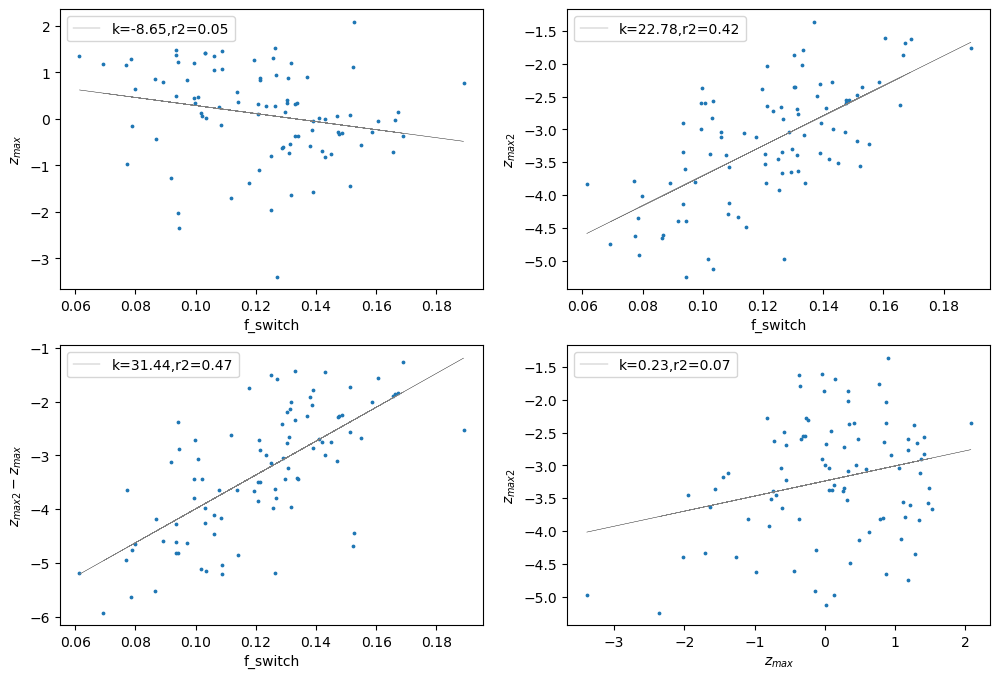

In [46]:
# 进行回归分析
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,2,1)
reg = LinearRegression().fit(f_switch_mean.reshape(-1,1),strength_max.reshape(-1,1))
r2 = reg.score(f_switch_mean.reshape(-1,1),strength_max.reshape(-1,1))
k = reg.coef_
b = reg.intercept_
ax1.scatter(f_switch_mean,strength_max,s=3)
ax1.plot(f_switch_mean,reg.predict(f_switch_mean.reshape(-1,1)),label='k=%.2f,r2=%.2f'%(k,r2),linewidth=0.3,color="grey")
ax1.set_xlabel('f_switch')
ax1.set_ylabel(r'$z_{max}$')
ax1.legend()

ax2 = plt.subplot(2,2,2)
reg = LinearRegression().fit(f_switch_mean.reshape(-1,1),strength_max2.reshape(-1,1))
r2 = reg.score(f_switch_mean.reshape(-1,1),strength_max2.reshape(-1,1))
k = reg.coef_
b = reg.intercept_
ax2.scatter(f_switch_mean,strength_max2,s=3)
ax2.plot(f_switch_mean,reg.predict(f_switch_mean.reshape(-1,1)),label='k=%.2f,r2=%.2f'%(k,r2),linewidth=0.3,color="grey")
ax2.set_xlabel('f_switch')
ax2.set_ylabel(r'$z_{max2}$')
ax2.legend()

ax3 = plt.subplot(2,2,3)
reg = LinearRegression().fit(f_switch_mean.reshape(-1,1),max2_max1.reshape(-1,1))
r2 = reg.score(f_switch_mean.reshape(-1,1),max2_max1.reshape(-1,1))
k = reg.coef_
b = reg.intercept_
ax3.scatter(f_switch_mean,max2_max1,s=3)
ax3.plot(f_switch_mean,reg.predict(f_switch_mean.reshape(-1,1)),label='k=%.2f,r2=%.2f'%(k,r2),linewidth=0.3,color="grey")
ax3.set_xlabel('f_switch')
ax3.set_ylabel(r'$z_{max2}-z_{max}$')
ax3.legend()

ax4 = plt.subplot(2,2,4)
reg = LinearRegression().fit(strength_max.reshape(-1,1),strength_max2.reshape(-1,1))
r2 = reg.score(strength_max.reshape(-1,1),strength_max2.reshape(-1,1))
k = reg.coef_
b = reg.intercept_
ax4.scatter(strength_max,strength_max2,s=3)
ax4.plot(strength_max,reg.predict(strength_max.reshape(-1,1)),label='k=%.2f,r2=%.2f'%(k,r2),linewidth=0.3,color="grey")
ax4.set_xlabel(r'$z_{max}$')
ax4.set_ylabel(r'$z_{max2}$')
ax4.legend()

In [47]:
std_commu_strength = np.zeros((strength_mat.shape[1],1))    
z_intra = np.zeros((strength_mat.shape[0],strength_mat.shape[1]))
for i in range(strength_mat.shape[1]):
    std_commu_strength[i] = np.std(strength_mat[membership==i,i]) + 0.1

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [48]:
np.min(strength_max)

-3.3909819397710614

In [49]:
max2_max1_vis = fmri_seq.visualize_single([1 if x>0.9 else 0 for x in max2_max1])
fmri_seq.print_membership_dicts([max2_max1_vis])

{"SUB": 0, "TEOm": 0, "13": 0, "TEpd": 0, "LB": 0, "11": 0, "7B": 0, "F5": 0, "V3A": 0, "V6A": 0, "31": 0, "VIP": 0, "V3": 0, "F1": 0, "STPi": 0, "23": 0, "AIP": 0, "TEpv": 0, "SII": 0, "V4t": 0, "MST": 0, "3": 0, "TEav": 0, "V1": 0, "MT": 0, "ProSt": 0, "PERI": 0, "9-46v": 0, "MIP": 0, "44": 0, "PBc": 0, "1": 0, "7A": 0, "5": 0, "10": 0, "TEam-a": 0, "OPRO": 0, "7op": 0, "V2": 0, "2": 0, "Core": 0, "9-46d": 0, "ProM": 0, "STPc": 0, "24a": 0, "F2": 0, "DP": 0, "LIP": 0, "PBr": 0, "PIR": 0, "46v": 0, "OPAI": 0, "MB": 0, "32": 0, "12": 0, "F3": 0, "V6": 0, "8B": 0, "INS": 0, "24c": 0, "PGa": 0, "45B": 0, "F4": 0, "Pi": 0, "TEO": 0, "V4": 0, "F6": 0, "14": 0, "25": 0, "46d": 0, "TEad": 0, "45A": 0, "STPr": 0, "24d": 0, "TPt": 0, "8l": 0, "24b": 0, "29-30": 0, "IPa": 0, "ENTO": 0, "8m": 0, "TEam-p": 0, "Gu": 0, "F7": 0, "TH-TF": 0, "7m": 0, "POLE": 0, "PIP": 0, "8r": 0, "FST": 0, "9": 0}


# max2/max1 > 0.9
https://scalablebrainatlas.incf.org/services/view3d_l2v.php?template=MERetal14_on_F99&space=F99&mesh=ctxL&deform=inflated&l2v=%7B%22SUB%22%3A+0%2C+%22TEOm%22%3A+0%2C+%2213%22%3A+0%2C+%22TEpd%22%3A+0%2C+%22LB%22%3A+0%2C+%2211%22%3A+0%2C+%227B%22%3A+0%2C+%22F5%22%3A+1%2C+%22V3A%22%3A+1%2C+%22V6A%22%3A+0%2C+%2231%22%3A+1%2C+%22VIP%22%3A+1%2C+%22V3%22%3A+0%2C+%22F1%22%3A+0%2C+%22STPi%22%3A+0%2C+%2223%22%3A+0%2C+%22AIP%22%3A+0%2C+%22TEpv%22%3A+1%2C+%22SII%22%3A+1%2C+%22V4t%22%3A+0%2C+%22MST%22%3A+1%2C+%223%22%3A+0%2C+%22TEav%22%3A+0%2C+%22V1%22%3A+0%2C+%22MT%22%3A+0%2C+%22ProSt%22%3A+1%2C+%22PERI%22%3A+0%2C+%229-46v%22%3A+1%2C+%22MIP%22%3A+1%2C+%2244%22%3A+1%2C+%22PBc%22%3A+0%2C+%221%22%3A+0%2C+%227A%22%3A+0%2C+%225%22%3A+0%2C+%2210%22%3A+0%2C+%22TEam-a%22%3A+0%2C+%22OPRO%22%3A+1%2C+%227op%22%3A+0%2C+%22V2%22%3A+0%2C+%222%22%3A+0%2C+%22Core%22%3A+0%2C+%229-46d%22%3A+0%2C+%22ProM%22%3A+0%2C+%22STPc%22%3A+0%2C+%2224a%22%3A+0%2C+%22F2%22%3A+0%2C+%22DP%22%3A+0%2C+%22LIP%22%3A+0%2C+%22PBr%22%3A+1%2C+%22PIR%22%3A+0%2C+%2246v%22%3A+0%2C+%22OPAI%22%3A+0%2C+%22MB%22%3A+0%2C+%2232%22%3A+0%2C+%2212%22%3A+1%2C+%22F3%22%3A+0%2C+%22V6%22%3A+0%2C+%228B%22%3A+1%2C+%22INS%22%3A+0%2C+%2224c%22%3A+0%2C+%22PGa%22%3A+0%2C+%2245B%22%3A+0%2C+%22F4%22%3A+1%2C+%22Pi%22%3A+0%2C+%22TEO%22%3A+0%2C+%22V4%22%3A+0%2C+%22F6%22%3A+0%2C+%2214%22%3A+0%2C+%2225%22%3A+0%2C+%2246d%22%3A+0%2C+%22TEad%22%3A+1%2C+%2245A%22%3A+1%2C+%22STPr%22%3A+0%2C+%2224d%22%3A+0%2C+%22TPt%22%3A+0%2C+%228l%22%3A+1%2C+%2224b%22%3A+0%2C+%2229-30%22%3A+1%2C+%22IPa%22%3A+0%2C+%22ENTO%22%3A+0%2C+%228m%22%3A+0%2C+%22TEam-p%22%3A+0%2C+%22Gu%22%3A+0%2C+%22F7%22%3A+0%2C+%22TH-TF%22%3A+0%2C+%227m%22%3A+0%2C+%22POLE%22%3A+0%2C+%22PIP%22%3A+0%2C+%228r%22%3A+0%2C+%22FST%22%3A+0%2C+%229%22%3A+0%7D&clim=%5B-1.5%2C1.5%5D&bg=%5B1000%2C1000%2C1000%5D&width=800&height=800&cam=L&overlay=values&format=xhtml

([<matplotlib.axis.YTick at 0x1eb9c9fe450>,
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '35'),
  Text(0, 2.5, '38'),
  Text(0, 3.5, '24'),
  Text(0, 4.5, '23'),
  Text(0, 5.5, '43'),
  Text(0, 6.5, '19'),
  Text(0, 7.5, '89'),
  Text(0, 8.5, '48'),
  Text(0, 9.5, '60'),
  Text(0, 10.5, '64'),
  Text(0, 11.5, '12'),
  Text(0, 12.5, '14'),
  Text(0, 13.5, '70'),
  Text(0, 14.5, '1'),
  Text(0, 15.5, '8'),
  Text(0, 16.5, '3'),
  Text(0, 17.5, '78'),
  Text(0, 18.5, '81'),
  Text(0, 19.5, '65'),
  Text(0, 20.5, '37'),
  Text(0, 21.5, '85'),
  Text(0, 22.5, '82'),
  Text(0, 23.5, '42'),
  Text(0, 24.5, '74'),
  Text(0, 25.5, '55'),
  Text(0, 26.5, '73'),
  Text(0, 27.5, '33'),
  Text(0, 28.5, '39'),
  Text(0, 29.5, '31'),
  Text(0, 30.5, '45'),
  Text(0, 31.5, '15'),
  Text(0, 32.5, '6'),
  Text(0, 33.5, '10'),
  Text(0, 34.5, '11'),
  Text(0, 35.5, '13'),
  Text(0, 36.5, '21'),
  Text(0, 37.5, '16'),
  Text(0, 38.5, '88'),
  Text(0, 39.5, '83'),
  Text(0, 40.5, '77'),
  Text(0, 41.5, '76'),
  Tex

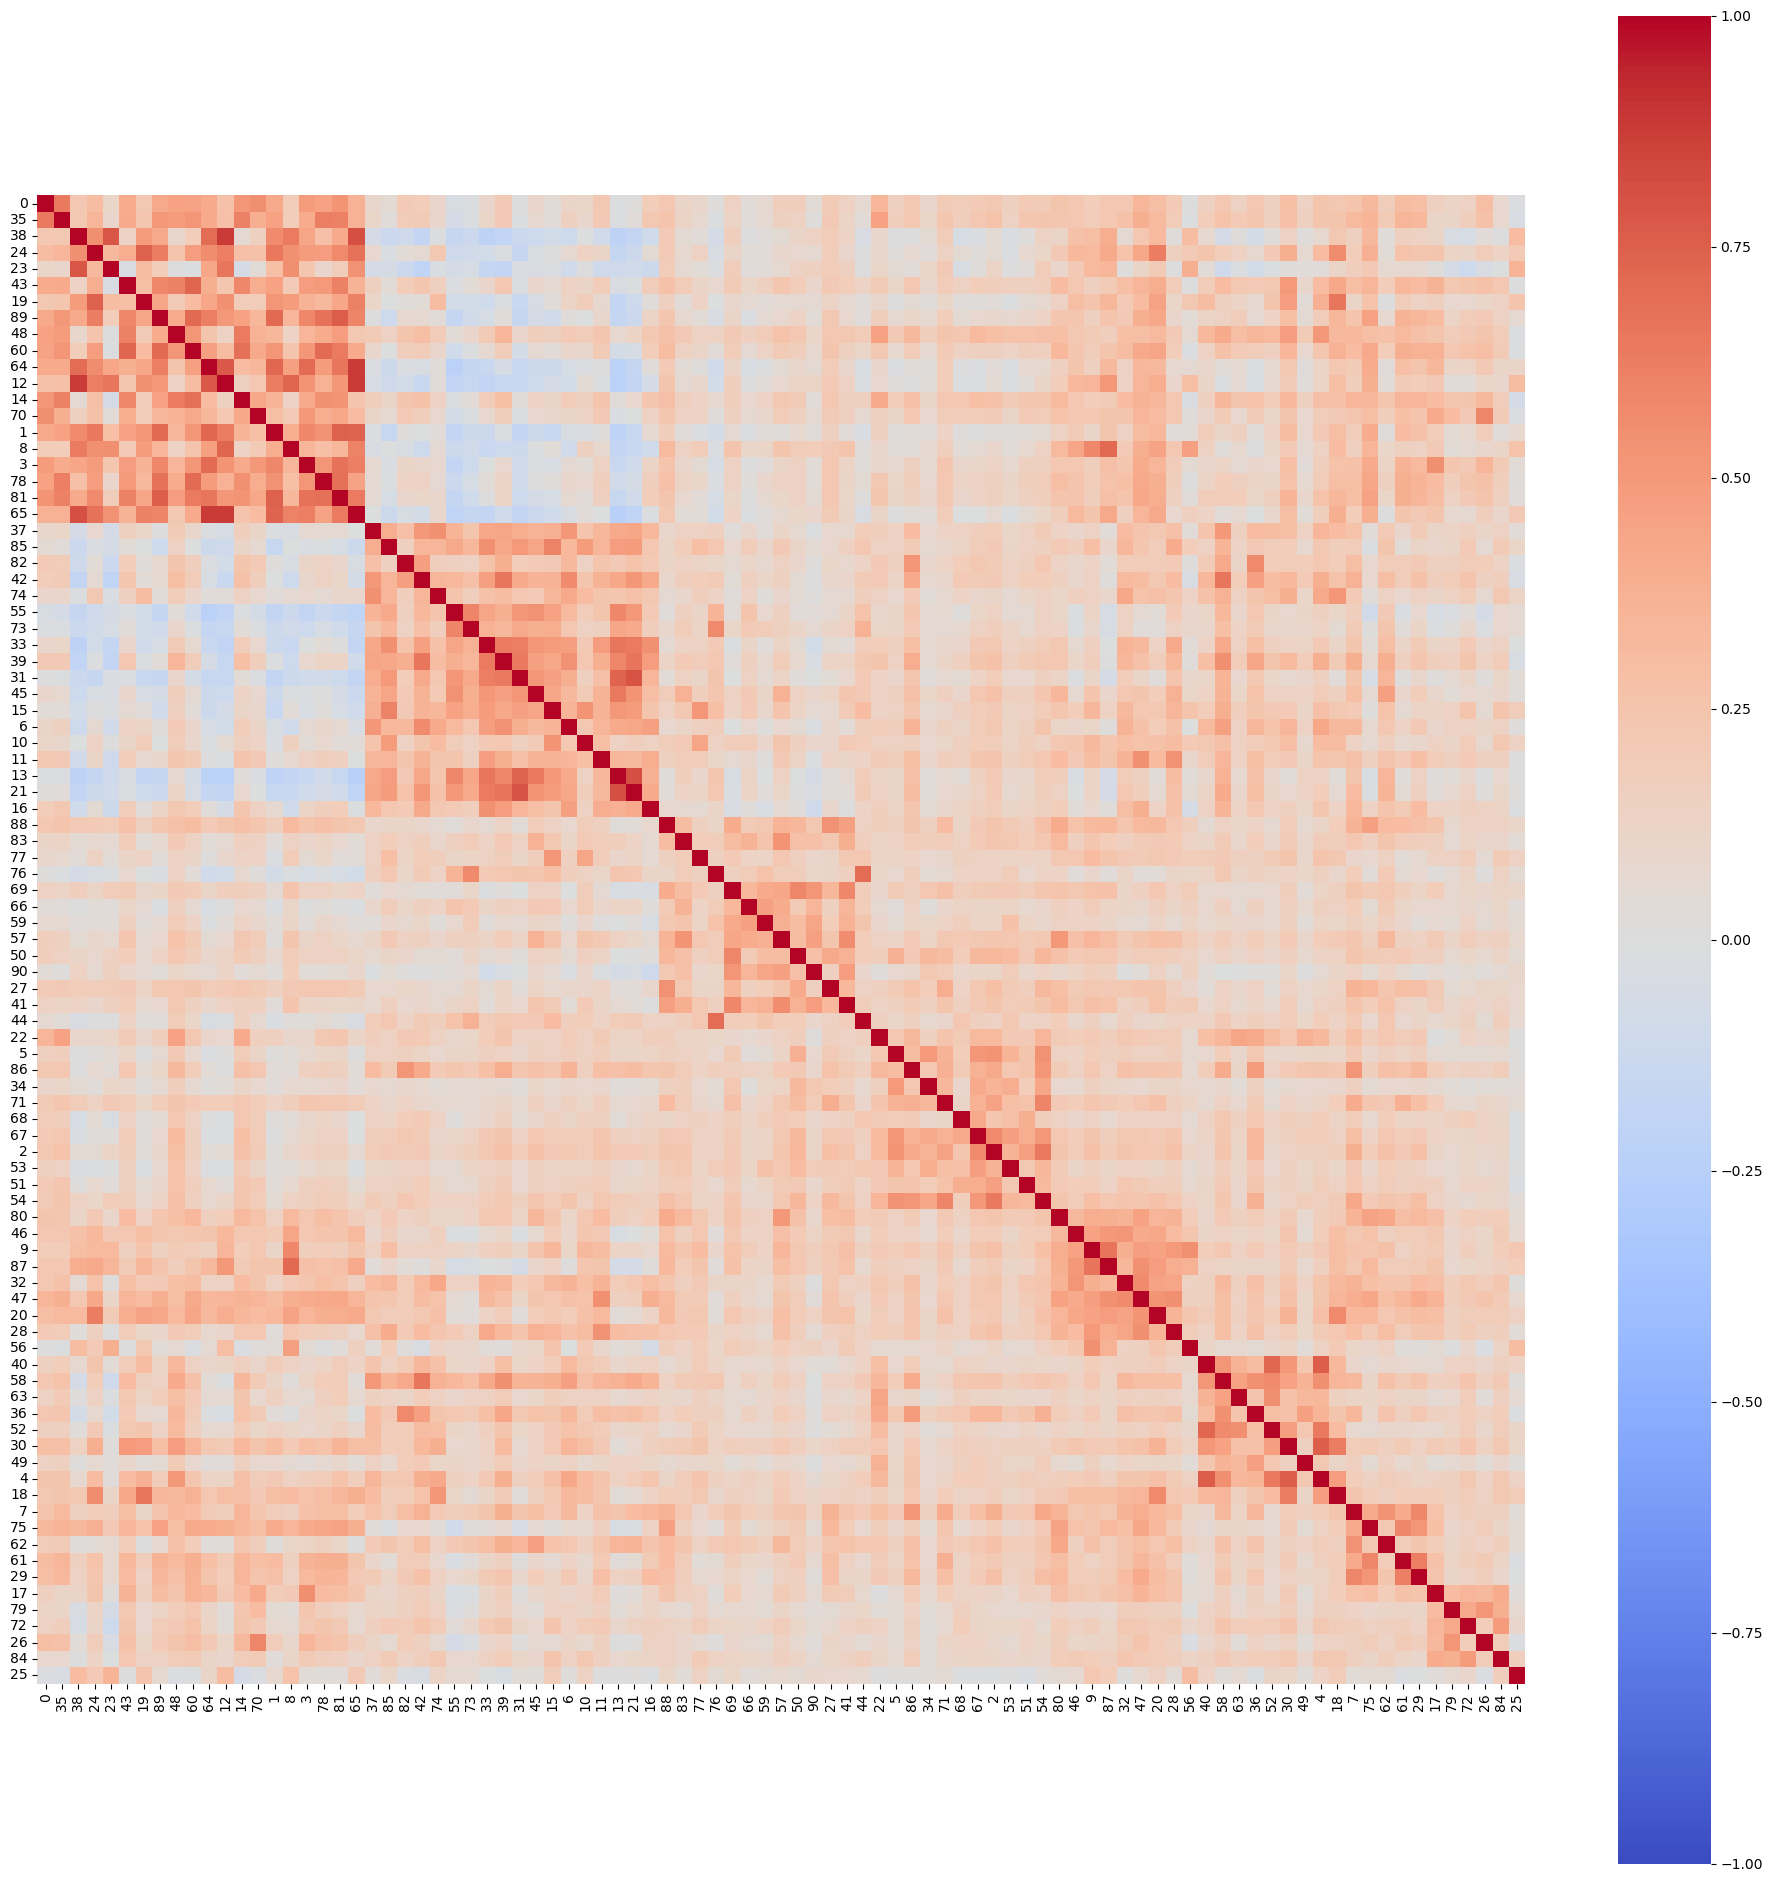

In [50]:
corr_mats_mean_try = corr_mats_mean.copy()
corr_mats_mean_try[max2_max1>0.6,:] = -2
corr_mats_mean_try[:,max2_max1>0.6] = -2
plt.figure(figsize=(24,24))
corr_mats_mean_try_rearrange = corr_mats_mean_try[membership_order,:]
corr_mats_mean_try_rearrange = corr_mats_mean_try_rearrange[:,membership_order]
sns.heatmap(corr_mats_mean_try_rearrange,cmap='coolwarm',square=True,vmin=-1)
plt.xticks(np.arange(0.5,91.5,1),membership_order)
plt.yticks(np.arange(0.5,91.5,1),membership_order)


In [51]:
coverage_total = []
for i in range(0,data.shape[0]):
    for j in range(data.shape[1]):
        data_seq = data[i,j]
        if data_seq.shape[1] < 10:
            continue
        # initialize the fMRISeq class
        fmri_seq = fMRISeq(data_seq,l_window =20,step =10)
        fmri_seq = fmri_seq.load_results('E:\\NS\\Primate fMRI\\community\\results\\l40_s20_%d_%d.pkl'%(i,j))
        #MSC_mats = fmri_seq.calc_MSC()

        #membership_array = fmri_seq.cluster_MSC(resolution_parameter = 1,pval = True,max_communities=0,seed = 8192,consider_empty_community = True)
        coverage = fmri_seq.node_coverage()
        coverage_total.append(coverage)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30316\2831614530.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(np.linspace(0.06,0.18,10).reshape(-1,1),reg.predict(np.linspace(0.06,0.18,10).reshape(-1,1)),label='k=%.2f,r2=%.2f'%(k,r2),linewidth=2,color="grey",linestyle='--')


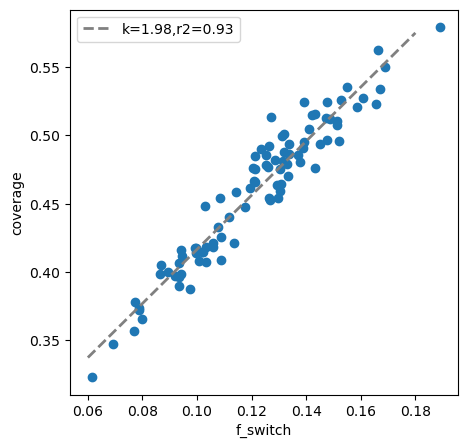

In [52]:
coverage_mat = np.array(coverage_total)
coverage_mean = np.mean(coverage_mat,axis=0)
plt.figure(figsize=(5,5))
plt.scatter(f_switch_mean,coverage_mean)
plt.xlabel('f_switch')
plt.ylabel('coverage')
# 线性回归
reg = LinearRegression().fit(f_switch_mean.reshape(-1,1),coverage_mean.reshape(-1,1))
r2 = reg.score(f_switch_mean.reshape(-1,1),coverage_mean.reshape(-1,1))
k = reg.coef_
b = reg.intercept_
plt.plot(np.linspace(0.06,0.18,10).reshape(-1,1),reg.predict(np.linspace(0.06,0.18,10).reshape(-1,1)),label='k=%.2f,r2=%.2f'%(k,r2),linewidth=2,color="grey",linestyle='--')
plt.legend()

# 这种正相关性是源于和其它node之间的连接，还是一种普遍的性质

In [53]:
b

array([0.21871496])